# New Notebook
dfgd.csv stands for datafram-good-drop and is all the students that answered the "How ofter do you feel the follwing?" question and the questions that those students answerd


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("dfgd.csv", header=[0, 1], low_memory=False)

TypeError: read_csv() got an unexpected keyword argument 'left_index'

In [6]:
df.columns.names = ["header_1", "header_2"]
header_1 = df.columns.get_level_values("header_1")
new_column_names = df.columns.to_frame(index=False, name=["header_1", "header_2"]).copy()
new_column_names.loc[new_column_names["header_1"].str.startswith("Unnamed"), "header_1"] = np.nan
new_column_names.at[0, "header_1"] = "No Group"
new_column_names["header_1"] = new_column_names["header_1"].ffill()
df.columns = pd.MultiIndex.from_frame(new_column_names)
df

header_1 No Group                                       \
header_2 header_2 hashed_id school_classification_list   
0              27   'b94e5'                    Primary   
1              28   '1a6a8'                    Primary   
2              29   'ef5ed'                    Primary   
3              30   '1b1f1'                    Primary   
4              31   '503d7'                  Secondary   
...           ...       ...                        ...   
34283       41238   'c9f7e'                    Primary   
34284       41239   '57fa4'                    Primary   
34285       41240   '89e5f'                    Primary   
34286       41241   '13d4d'                    Primary   
34287       41242   '2637a'                    Primary   

header_1                                               \
header_2 school_local_authority_filter_classification   
0                                               Leeds   
1                                               Leeds   
2                                               Leeds   
3                                               Leeds   
4                                               Leeds   
...                                               ...   
34283                                        National   
34284                                        National   
34285                                        National   
34286                                        National   
34287                                        National   

header_1                                                           \
header_2 questionnaire_login_year_group_name What is your gender?   
0                                     Year 6           Boy / Male   
1                                     Year 6        Girl / Female   
2                                     Year 6           Boy / Male   
3                                     Year 6           Boy / Male   
4                                     Year 9           Boy / Male   
...                                      ...                  ...   
34283                                 Year 6        Girl / Female   
34284                                 Year 6           Boy / Male   
34285                                 Year 6           Boy / Male   
34286                                 Year 6        Girl / Female   
34287                                 Year 6           Boy / Male   

header_1                                                                       \
header_2 Is your gender identity the same gender you were assigned at birth?    
0                                                       NaN                     
1                                                       NaN                     
2                                                       NaN                     
3                                                       NaN                     
4                                                       NaN                     
...                                                     ...                     
34283                                                   NaN                     
34284                                                   NaN                     
34285                                                   NaN                     
34286                                                   NaN                     
34287                                                   NaN                     

header_1                                               \
header_2 How would you describe your sexual identity?   
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                        Heterosexual   
...                                               ...   
34283                                             NaN   
34284                                 

In [219]:
findq("header_2").to_csv("orig_index.csv")

In [10]:
df.xs("Do you think there are safe spaces to play, hang out and have fun in your local area?", axis=1, level=1).value_counts()

Does anything stop you from taking part in physical activities?
Yes                                                                24711
Don’t know                                                          5538
No                                                                  4009
Name: count, dtype: int64

In [13]:
qs = pd.DataFrame()

In [32]:
q1 = df[("Does anything stop you from taking part in physical activities?","Do you think there are safe spaces to play, hang out and have fun in your local area?")]
q1

0               Yes
1               Yes
2               Yes
3               Yes
4               Yes
            ...    
34283           Yes
34284           Yes
34285           Yes
34286    Don’t know
34287           Yes
Name: (Does anything stop you from taking part in physical activities?, Do you think there are safe spaces to play, hang out and have fun in your local area?), Length: 34288, dtype: object

In [33]:
q1 = q1.replace({"Yes": 1, "Don’t know": 0, "No": 0})
q1

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\3813870871.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  q1 = q1.replace({"Yes": 1, "Don’t know": 0, "No": 0})


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
34283    1.0
34284    1.0
34285    1.0
34286    0.0
34287    1.0
Name: (Does anything stop you from taking part in physical activities?, Do you think there are safe spaces to play, hang out and have fun in your local area?), Length: 34288, dtype: float64

In [34]:
qs["Do you think there are safe spaces to play, hang out and have fun in your local area?"] = q1
qs

Do you think there are safe spaces to play, hang out and have fun in your local area?
0                                                    1.0                                    
1                                                    1.0                                    
2                                                    1.0                                    
3                                                    1.0                                    
4                                                    1.0                                    
...                                                  ...                                    
34283                                                1.0                                    
34284                                                1.0                                    
34285                                                1.0                                    
34286                                                0.0                                    
34287                                                1.0                                    

[34288 rows x 1 columns]

In [36]:
def findq(question: str):
    try:
        return df.xs(question, axis=1, level=0)
    except:
        return df.xs(question, axis=1, level=1)

q2 = findq("Have you ever hurt yourself on purpose? (Often referred to as self-harm)")

In [37]:
q2.describe()


header_1 If you have been bullied in or around school/college in the last 12 months, do you think it was because of any of the following?
count                                                 18383                                                                              
unique                                                    2                                                                              
top                                                      No                                                                              
freq                                                  13444

In [38]:
q5 = findq("In the last 12 months how safe have you felt in the following places?")
q5

header_2 At school/college, not in lessons During lessons at school/college  \
0                                     Safe                             Safe   
1                                     Safe                             Safe   
2                                 Not Sure                             Safe   
3                                     Safe                             Safe   
4                                 Not Sure                         Not Sure   
...                                    ...                              ...   
34283                             Not Sure                         Not Sure   
34284                               Unsafe                             Safe   
34285                                 Safe                             Safe   
34286                                 Safe                             Safe   
34287                                 Safe                             Safe   

header_2 Travelling to and from school/college School/college toilets  
0                                         Safe                   Safe  
1                                         Safe               Not Sure  
2                                     Not Sure               Not Sure  
3                                         Safe                   Safe  
4                                     Not Sure                 Unsafe  
...                                        ...                    ...  
34283                                 Not Sure               Not Sure  
34284                                     Safe                 Unsafe  
34285                                     Safe                   Safe  
34286                                     Safe               Not Sure  
34287                                     Safe                   Safe  

[34288 rows x 4 columns]

In [39]:
q5 = q5.replace({"Safe": 1, "Not Sure": 0, "Unsafe": 0})
q5

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\3383140177.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  q5 = q5.replace({"Safe": 1, "Not Sure": 0, "Unsafe": 0})


header_2  At school/college, not in lessons  During lessons at school/college  \
0                                       1.0                               1.0   
1                                       1.0                               1.0   
2                                       0.0                               1.0   
3                                       1.0                               1.0   
4                                       0.0                               0.0   
...                                     ...                               ...   
34283                                   0.0                               0.0   
34284                                   0.0                               1.0   
34285                                   1.0                               1.0   
34286                                   1.0                               1.0   
34287                                   1.0                               1.0   

header_2  Travelling to and from school/college  School/college toilets  
0                                           1.0                     1.0  
1                                           1.0                     0.0  
2                                           0.0                     0.0  
3                                           1.0                     1.0  
4                                           0.0                     0.0  
...                                         ...                     ...  
34283                                       0.0                     0.0  
34284                                       1.0                     0.0  
34285                                       1.0                     1.0  
34286                                       1.0                     0.0  
34287                                       1.0                     1.0  

[34288 rows x 4 columns]

In [41]:
q5["Safe score"] = q5.sum(axis=1)
q5

header_2  At school/college, not in lessons  During lessons at school/college  \
0                                       1.0                               1.0   
1                                       1.0                               1.0   
2                                       0.0                               1.0   
3                                       1.0                               1.0   
4                                       0.0                               0.0   
...                                     ...                               ...   
34283                                   0.0                               0.0   
34284                                   0.0                               1.0   
34285                                   1.0                               1.0   
34286                                   1.0                               1.0   
34287                                   1.0                               1.0   

header_2  Travelling to and from school/college  School/college toilets  \
0                                           1.0                     1.0   
1                                           1.0                     0.0   
2                                           0.0                     0.0   
3                                           1.0                     1.0   
4                                           0.0                     0.0   
...                                         ...                     ...   
34283                                       0.0                     0.0   
34284                                       1.0                     0.0   
34285                                       1.0                     1.0   
34286                                       1.0                     0.0   
34287                                       1.0                     1.0   

header_2  Safe score  
0                4.0  
1                3.0  
2                1.0  
3                4.0  
4                0.0  
...              ...  
34283            0.0  
34284            2.0  
34285            4.0  
34286            3.0  
34287            4.0  

[34288 rows x 5 columns]

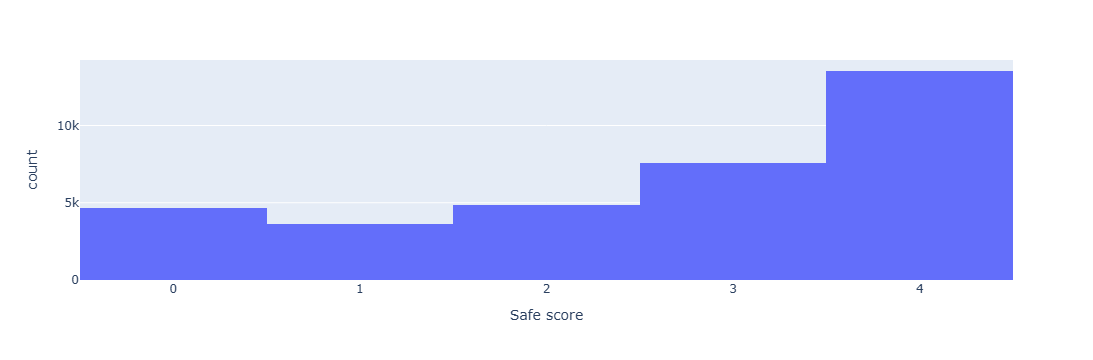

In [43]:
px.histogram(q5, x="Safe score")

In [44]:
qs

Do you think there are safe spaces to play, hang out and have fun in your local area?
0                                                    1.0                                    
1                                                    1.0                                    
2                                                    1.0                                    
3                                                    1.0                                    
4                                                    1.0                                    
...                                                  ...                                    
34283                                                1.0                                    
34284                                                1.0                                    
34285                                                1.0                                    
34286                                                0.0                                    
34287                                                1.0                                    

[34288 rows x 1 columns]

In [46]:
qs["Q5 Safe Score"] = q5["Safe score"]
qs

Do you think there are safe spaces to play, hang out and have fun in your local area?  \
0                                                    1.0                                       
1                                                    1.0                                       
2                                                    1.0                                       
3                                                    1.0                                       
4                                                    1.0                                       
...                                                  ...                                       
34283                                                1.0                                       
34284                                                1.0                                       
34285                                                1.0                                       
34286                                                0.0                                       
34287                                                1.0                                       

       Q5 Safe Score  
0                4.0  
1                3.0  
2                1.0  
3                4.0  
4                0.0  
...              ...  
34283            0.0  
34284            2.0  
34285            4.0  
34286            3.0  
34287            4.0  

[34288 rows x 2 columns]

In [51]:
q6 = findq("In the last 12 months, how often (if at all) have you been bullied in or around school/college?")
q6

header_1 How well do you think you cope with feeling the following?
0                                                Not at all        
1                                                Not at all        
2                                                Not at all        
3                                                Not at all        
4                                                Not at all        
...                                                     ...        
34283                                            Not at all        
34284                                           Every month        
34285                                 A few times this year        
34286                                            Not at all        
34287                                            Not at all        

[34288 rows x 1 columns]

In [52]:
q6.value_counts()

How well do you think you cope with feeling the following?
Not at all                                                    19971
A few times this year                                         10049
Most days / Every day                                          1852
Every month                                                    1222
Every week                                                     1154
Name: count, dtype: int64

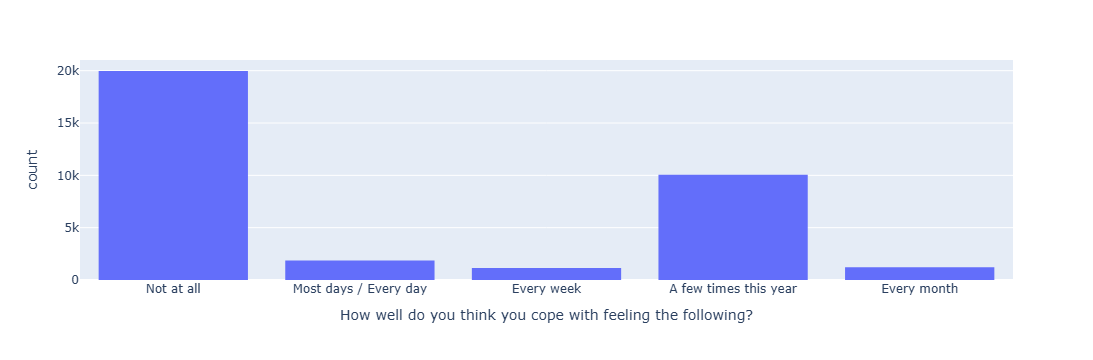

In [54]:
px.histogram(q6, 'How well do you think you cope with feeling the following?')

In [55]:
bully_weights = {"Not at all": 0, "A few times this year": 1, "Every month": 3, "Every week": 4, "Most days / Every day": 5}
q6 = q6.replace(bully_weights)
q6

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\3473954355.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



header_1  How well do you think you cope with feeling the following?
0                                                       0.0         
1                                                       0.0         
2                                                       0.0         
3                                                       0.0         
4                                                       0.0         
...                                                     ...         
34283                                                   0.0         
34284                                                   3.0         
34285                                                   1.0         
34286                                                   0.0         
34287                                                   0.0         

[34288 rows x 1 columns]

In [56]:
qs["Q6 Bullying frequency"] = q6['How well do you think you cope with feeling the following?']
qs

Do you think there are safe spaces to play, hang out and have fun in your local area?  \
0                                                    1.0                                       
1                                                    1.0                                       
2                                                    1.0                                       
3                                                    1.0                                       
4                                                    1.0                                       
...                                                  ...                                       
34283                                                1.0                                       
34284                                                1.0                                       
34285                                                1.0                                       
34286                                                0.0                                       
34287                                                1.0                                       

       Q5 Safe Score  Q6 Bullying frequency  
0                4.0                    0.0  
1                3.0                    0.0  
2                1.0                    0.0  
3                4.0                    0.0  
4                0.0                    0.0  
...              ...                    ...  
34283            0.0                    0.0  
34284            2.0                    3.0  
34285            4.0                    1.0  
34286            3.0                    0.0  
34287            4.0                    0.0  

[34288 rows x 3 columns]

In [57]:
q8 = findq("On a normal day, how many hours a day, do you usually spend sitting down watching TV/playing computer games/using the internet/using a mobile phone?")
q8

header_1 What are the main reasons (barriers) that stop you from travelling actively to school/college (active travel includes walking, running, scooting and cycling)?
0                                         More than 5 hours                                                                                                            
1                                         Less than 2 hours                                                                                                            
2                                         More than 5 hours                                                                                                            
3                                               2 - 5 hours                                                                                                            
4                                         More than 5 hours                                                                                                            
...                                                     ...                                                                                                            
34283                                           2 - 5 hours                                                                                                            
34284                                           2 - 5 hours                                                                                                            
34285                                           2 - 5 hours                                                                                                            
34286                                     More than 5 hours                                                                                                            
34287                                     More than 5 hours                                                                                                            

[34288 rows x 1 columns]

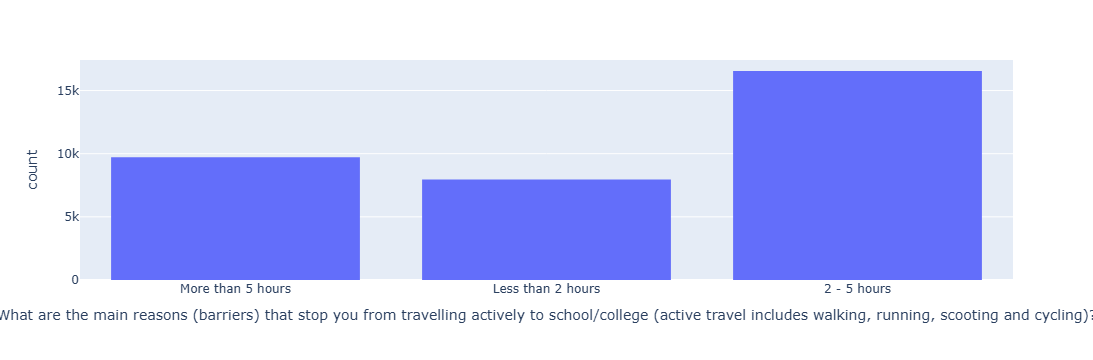

In [59]:
px.histogram(q8, x="What are the main reasons (barriers) that stop you from travelling actively to school/college (active travel includes walking, running, scooting and cycling)?")

In [60]:
sleep_weights = {"Less than 2 hours": 0, "2 - 5 hours": 1, "More than 5 hours": 2}
q8 = q8.replace(sleep_weights)

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\4028780405.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [61]:
q8

header_1  What are the main reasons (barriers) that stop you from travelling actively to school/college (active travel includes walking, running, scooting and cycling)?
0                                                       2.0                                                                                                             
1                                                       0.0                                                                                                             
2                                                       2.0                                                                                                             
3                                                       1.0                                                                                                             
4                                                       2.0                                                                                                             
...                                                     ...                                                                                                             
34283                                                   1.0                                                                                                             
34284                                                   1.0                                                                                                             
34285                                                   1.0                                                                                                             
34286                                                   2.0                                                                                                             
34287                                                   2.0                                                                                                             

[34288 rows x 1 columns]

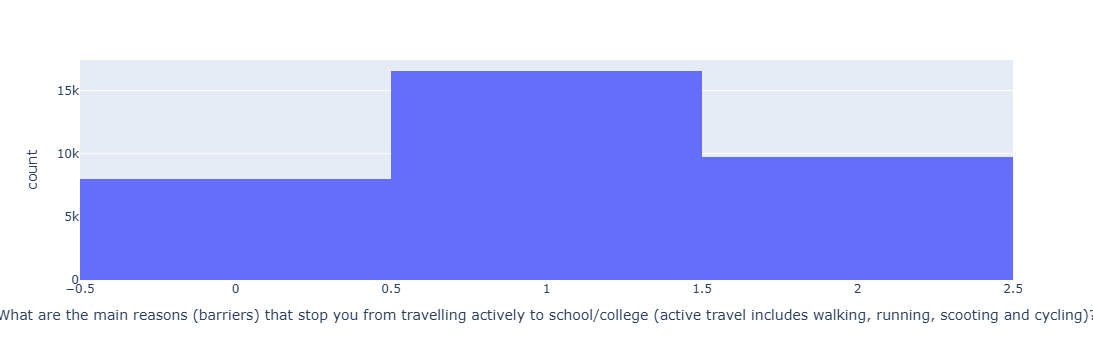

In [62]:
px.histogram(q8, x="What are the main reasons (barriers) that stop you from travelling actively to school/college (active travel includes walking, running, scooting and cycling)?")

In [63]:
qs["Q8 Sleep time"] = q8["What are the main reasons (barriers) that stop you from travelling actively to school/college (active travel includes walking, running, scooting and cycling)?"]
qs

Do you think there are safe spaces to play, hang out and have fun in your local area?  \
0                                                    1.0                                       
1                                                    1.0                                       
2                                                    1.0                                       
3                                                    1.0                                       
4                                                    1.0                                       
...                                                  ...                                       
34283                                                1.0                                       
34284                                                1.0                                       
34285                                                1.0                                       
34286                                                0.0                                       
34287                                                1.0                                       

       Q5 Safe Score  Q6 Bullying frequency  Q8 Sleep time  
0                4.0                    0.0            2.0  
1                3.0                    0.0            0.0  
2                1.0                    0.0            2.0  
3                4.0                    0.0            1.0  
4                0.0                    0.0            2.0  
...              ...                    ...            ...  
34283            0.0                    0.0            1.0  
34284            2.0                    3.0            1.0  
34285            4.0                    1.0            1.0  
34286            3.0                    0.0            2.0  
34287            4.0                    0.0            2.0  

[34288 rows x 4 columns]

In [64]:
q10 = findq("Over the last 12 months have you worried about any of the following?")
q10

header_2 My disability A family member's gambling behaviour  \
0                  NaN                                  NaN   
1                  NaN                                  NaN   
2                  NaN                                  NaN   
3                  NaN                                  NaN   
4                  NaN                                  NaN   
...                ...                                  ...   
34283              NaN                                  NaN   
34284              NaN                                  NaN   
34285              NaN                                  NaN   
34286              NaN                                  NaN   
34287              NaN                                  NaN   

header_2 Money problems (mine/family members)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
34283                                     NaN   
34284                                     NaN   
34285                                     NaN   
34286                                     NaN   
34287                                     NaN   

header_2 Pressure to do the same as my friends Going to college/university  \
0                                          NaN                         NaN   
1                                          NaN                         NaN   
2                                            X                         NaN   
3                                            X                         NaN   
4                                          NaN                         NaN   
...                                        ...                         ...   
34283                                      NaN                         NaN   
34284                                      NaN                         NaN   
34285                                      NaN                         NaN   
34286                                      NaN                         NaN   
34287                                      NaN                         NaN   

header_2 Not having enough to eat because my family didn't have enough money for food  \
0                                                       NaN                             
1                                                       NaN                             
2                                                       NaN                             
3                                                       NaN                             
4                                                       NaN                             
...                                                     ...                             
34283                                                   NaN                             
34284                                                   NaN                             
34285                                                   NaN                             
34286                                                   NaN                             
34287                                                   NaN                             

header_2 A family member's use of drugs, alcohol or tobacco Feeling lonely  \
0                                                       NaN            NaN   
1                                                       NaN            NaN   
2                                                       NaN            NaN   
3                                                       NaN            NaN   
4                                                       NaN            NaN   
...                                                     ...            ...   
34283                                                   NaN              X   
34284                   

In [66]:
q10.describe()

header_2 My disability A family member's gambling behaviour  \
count             1600                                  827   
unique               1                                    1   
top                  X                                    X   
freq              1600                                  827   

header_2 Money problems (mine/family members)  \
count                                    5457   
unique                                      1   
top                                         X   
freq                                     5457   

header_2 Pressure to do the same as my friends Going to college/university  \
count                                     4957                        2370   
unique                                       1                           1   
top                                          X                           X   
freq                                      4957                        2370   

header_2 Not having enough to eat because my family didn't have enough money for food  \
count                                                  1099                             
unique                                                    1                             
top                                                       X                             
freq                                                   1099                             

header_2 A family member's use of drugs, alcohol or tobacco Feeling lonely  \
count                                                  3877           8477   
unique                                                    1              1   
top                                                       X              X   
freq                                                   3877           8477   

header_2 My own use of drugs, alcohol or tobacco My own gambling behaviour  \
count                                       1084                       369   
unique                                         1                         1   
top                                            X                         X   
freq                                        1084                       369   

header_2  ... Gender identity Not being accepted for who I am   War  \
count     ...             920                            2554  5824   
unique    ...               1                               1     1   
top       ...               X                               X     X   
freq      ...             920                            2554  5824   

header_2 Being bullied A separation A death Travelling to school/college  \
count             6640         5886   11671                         2303   
unique               1            1       1                            1   
top                  X            X       X                            X   
freq              6640         5886   11671                         2303   

header_2 Getting a job School/college work Friendships  
count             2942                7267       13081  
unique               1                   1           1  
top                  X                   X           X  
freq              2942                7267       13081  

[4 rows x 33 columns]

In [67]:
q10.columns

Index(['My disability', 'A family member's gambling behaviour',
       'Money problems (mine/family members)',
       'Pressure to do the same as my friends', 'Going to college/university',
       'Not having enough to eat because my family didn't have enough money for food',
       'A family member's use of drugs, alcohol or tobacco', 'Feeling lonely',
       'My own use of drugs, alcohol or tobacco', 'My own gambling behaviour',
       'Going to a new school', 'The way I look',
       'I do not worry about anything', 'Climate change', 'Other',
       'Going places on my own', 'Getting an apprenticeship', 'Exams',
       'Romantic Partners', 'Sex (STIs, pregnancy)',
       'Health problems (mine/family members)', 'Housing',
       'My parent(s)/carer(s) or family', 'Gender identity',
       'Not being accepted for who I am', 'War', 'Being bullied',
       'A separation', 'A death', 'Travelling to school/college',
       'Getting a job', 'School/college work', 'Friendships'],
      dty

In [69]:
not_worry = q10['I do not worry about anything']
q10.drop('I do not worry about anything', axis=1)
q10.columns

Index(['My disability', 'A family member's gambling behaviour',
       'Money problems (mine/family members)',
       'Pressure to do the same as my friends', 'Going to college/university',
       'Not having enough to eat because my family didn't have enough money for food',
       'A family member's use of drugs, alcohol or tobacco', 'Feeling lonely',
       'My own use of drugs, alcohol or tobacco', 'My own gambling behaviour',
       'Going to a new school', 'The way I look',
       'I do not worry about anything', 'Climate change', 'Other',
       'Going places on my own', 'Getting an apprenticeship', 'Exams',
       'Romantic Partners', 'Sex (STIs, pregnancy)',
       'Health problems (mine/family members)', 'Housing',
       'My parent(s)/carer(s) or family', 'Gender identity',
       'Not being accepted for who I am', 'War', 'Being bullied',
       'A separation', 'A death', 'Travelling to school/college',
       'Getting a job', 'School/college work', 'Friendships'],
      dty

In [70]:
not_worry

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
34283    NaN
34284    NaN
34285    NaN
34286    NaN
34287      X
Name: I do not worry about anything, Length: 34288, dtype: object

In [72]:
q10.drop('I do not worry about anything', axis=1, inplace=True)
q10.columns

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\2512147826.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['My disability', 'A family member's gambling behaviour',
       'Money problems (mine/family members)',
       'Pressure to do the same as my friends', 'Going to college/university',
       'Not having enough to eat because my family didn't have enough money for food',
       'A family member's use of drugs, alcohol or tobacco', 'Feeling lonely',
       'My own use of drugs, alcohol or tobacco', 'My own gambling behaviour',
       'Going to a new school', 'The way I look', 'Climate change', 'Other',
       'Going places on my own', 'Getting an apprenticeship', 'Exams',
       'Romantic Partners', 'Sex (STIs, pregnancy)',
       'Health problems (mine/family members)', 'Housing',
       'My parent(s)/carer(s) or family', 'Gender identity',
       'Not being accepted for who I am', 'War', 'Being bullied',
       'A separation', 'A death', 'Travelling to school/college',
       'Getting a job', 'School/college work', 'Friendships'],
      dtype='object', name='header_2')

In [73]:
q10

header_2 My disability A family member's gambling behaviour  \
0                  NaN                                  NaN   
1                  NaN                                  NaN   
2                  NaN                                  NaN   
3                  NaN                                  NaN   
4                  NaN                                  NaN   
...                ...                                  ...   
34283              NaN                                  NaN   
34284              NaN                                  NaN   
34285              NaN                                  NaN   
34286              NaN                                  NaN   
34287              NaN                                  NaN   

header_2 Money problems (mine/family members)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
34283                                     NaN   
34284                                     NaN   
34285                                     NaN   
34286                                     NaN   
34287                                     NaN   

header_2 Pressure to do the same as my friends Going to college/university  \
0                                          NaN                         NaN   
1                                          NaN                         NaN   
2                                            X                         NaN   
3                                            X                         NaN   
4                                          NaN                         NaN   
...                                        ...                         ...   
34283                                      NaN                         NaN   
34284                                      NaN                         NaN   
34285                                      NaN                         NaN   
34286                                      NaN                         NaN   
34287                                      NaN                         NaN   

header_2 Not having enough to eat because my family didn't have enough money for food  \
0                                                       NaN                             
1                                                       NaN                             
2                                                       NaN                             
3                                                       NaN                             
4                                                       NaN                             
...                                                     ...                             
34283                                                   NaN                             
34284                                                   NaN                             
34285                                                   NaN                             
34286                                                   NaN                             
34287                                                   NaN                             

header_2 A family member's use of drugs, alcohol or tobacco Feeling lonely  \
0                                                       NaN            NaN   
1                                                       NaN            NaN   
2                                                       NaN            NaN   
3                                                       NaN            NaN   
4                                                       NaN            NaN   
...                                                     ...            ...   
34283                                                   NaN              X   
34284                   

In [75]:
q10 = ~q10.isna()

In [76]:
q10

header_2  My disability  A family member's gambling behaviour  \
0                 False                                 False   
1                 False                                 False   
2                 False                                 False   
3                 False                                 False   
4                 False                                 False   
...                 ...                                   ...   
34283             False                                 False   
34284             False                                 False   
34285             False                                 False   
34286             False                                 False   
34287             False                                 False   

header_2  Money problems (mine/family members)  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
34283                                    False   
34284                                    False   
34285                                    False   
34286                                    False   
34287                                    False   

header_2  Pressure to do the same as my friends  Going to college/university  \
0                                         False                        False   
1                                         False                        False   
2                                          True                        False   
3                                          True                        False   
4                                         False                        False   
...                                         ...                          ...   
34283                                     False                        False   
34284                                     False                        False   
34285                                     False                        False   
34286                                     False                        False   
34287                                     False                        False   

header_2  Not having enough to eat because my family didn't have enough money for food  \
0                                                     False                              
1                                                     False                              
2                                                     False                              
3                                                     False                              
4                                                     False                              
...                                                     ...                              
34283                                                 False                              
34284                                                 False                              
34285                                                 False                              
34286                                                 False                              
34287                                                 False                              

header_2  A family member's use of drugs, alcohol or tobacco  Feeling lonely  \
0                                                     False            False   
1                                                     False            False   
2                                                     False            False   
3                                                     False            False   
4                                                     False            False   
...                                                     ...              ...   
34283           

In [79]:
#q10["Worry count"] = df.sum(axis=1)
q10.describe()

header_2 My disability A family member's gambling behaviour  \
count            34288                                34288   
unique               2                                    2   
top              False                                False   
freq             32688                                33461   

header_2 Money problems (mine/family members)  \
count                                   34288   
unique                                      2   
top                                     False   
freq                                    28831   

header_2 Pressure to do the same as my friends Going to college/university  \
count                                    34288                       34288   
unique                                       2                           2   
top                                      False                       False   
freq                                     29331                       31918   

header_2 Not having enough to eat because my family didn't have enough money for food  \
count                                                 34288                             
unique                                                    2                             
top                                                   False                             
freq                                                  33189                             

header_2 A family member's use of drugs, alcohol or tobacco Feeling lonely  \
count                                                 34288          34288   
unique                                                    2              2   
top                                                   False          False   
freq                                                  30411          25811   

header_2 My own use of drugs, alcohol or tobacco My own gambling behaviour  \
count                                      34288                     34288   
unique                                         2                         2   
top                                        False                     False   
freq                                       33204                     33919   

header_2  ... Gender identity Not being accepted for who I am    War  \
count     ...           34288                           34288  34288   
unique    ...               2                               2      2   
top       ...           False                           False  False   
freq      ...           33368                           31734  28464   

header_2 Being bullied A separation A death Travelling to school/college  \
count            34288        34288   34288                        34288   
unique               2            2       2                            2   
top              False        False   False                        False   
freq             27648        28402   22617                        31985   

header_2 Getting a job School/college work Friendships  
count            34288               34288       34288  
unique               2                   2           2  
top              False               False       False  
freq             31346               27021       21207  

[4 rows x 32 columns]

In [81]:
q10["Worry count"] = df.sum(axis=1, numeric_only=True)
q10

header_2  My disability  A family member's gambling behaviour  \
0                 False                                 False   
1                 False                                 False   
2                 False                                 False   
3                 False                                 False   
4                 False                                 False   
...                 ...                                   ...   
34283             False                                 False   
34284             False                                 False   
34285             False                                 False   
34286             False                                 False   
34287             False                                 False   

header_2  Money problems (mine/family members)  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
34283                                    False   
34284                                    False   
34285                                    False   
34286                                    False   
34287                                    False   

header_2  Pressure to do the same as my friends  Going to college/university  \
0                                         False                        False   
1                                         False                        False   
2                                          True                        False   
3                                          True                        False   
4                                         False                        False   
...                                         ...                          ...   
34283                                     False                        False   
34284                                     False                        False   
34285                                     False                        False   
34286                                     False                        False   
34287                                     False                        False   

header_2  Not having enough to eat because my family didn't have enough money for food  \
0                                                     False                              
1                                                     False                              
2                                                     False                              
3                                                     False                              
4                                                     False                              
...                                                     ...                              
34283                                                 False                              
34284                                                 False                              
34285                                                 False                              
34286                                                 False                              
34287                                                 False                              

header_2  A family member's use of drugs, alcohol or tobacco  Feeling lonely  \
0                                                     False            False   
1                                                     False            False   
2                                                     False            False   
3                                                     False            False   
4                                                     False            False   
...                                                     ...              ...   
34283           

In [83]:
q10.replace({True: 1, False: 0})
q10

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\2332161335.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



header_2  My disability  A family member's gambling behaviour  \
0                 False                                 False   
1                 False                                 False   
2                 False                                 False   
3                 False                                 False   
4                 False                                 False   
...                 ...                                   ...   
34283             False                                 False   
34284             False                                 False   
34285             False                                 False   
34286             False                                 False   
34287             False                                 False   

header_2  Money problems (mine/family members)  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
34283                                    False   
34284                                    False   
34285                                    False   
34286                                    False   
34287                                    False   

header_2  Pressure to do the same as my friends  Going to college/university  \
0                                         False                        False   
1                                         False                        False   
2                                          True                        False   
3                                          True                        False   
4                                         False                        False   
...                                         ...                          ...   
34283                                     False                        False   
34284                                     False                        False   
34285                                     False                        False   
34286                                     False                        False   
34287                                     False                        False   

header_2  Not having enough to eat because my family didn't have enough money for food  \
0                                                     False                              
1                                                     False                              
2                                                     False                              
3                                                     False                              
4                                                     False                              
...                                                     ...                              
34283                                                 False                              
34284                                                 False                              
34285                                                 False                              
34286                                                 False                              
34287                                                 False                              

header_2  A family member's use of drugs, alcohol or tobacco  Feeling lonely  \
0                                                     False            False   
1                                                     False            False   
2                                                     False            False   
3                                                     False            False   
4                                                     False            False   
...                                                     ...              ...   
34283           

In [85]:
q10["max num"] = q10.drop("Worry count", axis=1).max(axis=1)
q10

header_2  My disability  A family member's gambling behaviour  \
0                 False                                 False   
1                 False                                 False   
2                 False                                 False   
3                 False                                 False   
4                 False                                 False   
...                 ...                                   ...   
34283             False                                 False   
34284             False                                 False   
34285             False                                 False   
34286             False                                 False   
34287             False                                 False   

header_2  Money problems (mine/family members)  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
34283                                    False   
34284                                    False   
34285                                    False   
34286                                    False   
34287                                    False   

header_2  Pressure to do the same as my friends  Going to college/university  \
0                                         False                        False   
1                                         False                        False   
2                                          True                        False   
3                                          True                        False   
4                                         False                        False   
...                                         ...                          ...   
34283                                     False                        False   
34284                                     False                        False   
34285                                     False                        False   
34286                                     False                        False   
34287                                     False                        False   

header_2  Not having enough to eat because my family didn't have enough money for food  \
0                                                     False                              
1                                                     False                              
2                                                     False                              
3                                                     False                              
4                                                     False                              
...                                                     ...                              
34283                                                 False                              
34284                                                 False                              
34285                                                 False                              
34286                                                 False                              
34287                                                 False                              

header_2  A family member's use of drugs, alcohol or tobacco  Feeling lonely  \
0                                                     False            False   
1                                                     False            False   
2                                                     False            False   
3                                                     False            False   
4                                                     False            False   
...                                                     ...              ...   
34283           

In [86]:
q10.dtypes

header_2
My disability                                                                      bool
A family member's gambling behaviour                                               bool
Money problems (mine/family members)                                               bool
Pressure to do the same as my friends                                              bool
Going to college/university                                                        bool
Not having enough to eat because my family didn't have enough money for food       bool
A family member's use of drugs, alcohol or tobacco                                 bool
Feeling lonely                                                                     bool
My own use of drugs, alcohol or tobacco                                            bool
My own gambling behaviour                                                          bool
Going to a new school                                                              bool
The way I look         

In [87]:
q10_new = findq("Over the last 12 months have you worried about any of the following?")
q10_new["Worry count"] = q10.count(axis=1)
q10_new

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\3502466462.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



header_2 My disability A family member's gambling behaviour  \
0                  NaN                                  NaN   
1                  NaN                                  NaN   
2                  NaN                                  NaN   
3                  NaN                                  NaN   
4                  NaN                                  NaN   
...                ...                                  ...   
34283              NaN                                  NaN   
34284              NaN                                  NaN   
34285              NaN                                  NaN   
34286              NaN                                  NaN   
34287              NaN                                  NaN   

header_2 Money problems (mine/family members)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
34283                                     NaN   
34284                                     NaN   
34285                                     NaN   
34286                                     NaN   
34287                                     NaN   

header_2 Pressure to do the same as my friends Going to college/university  \
0                                          NaN                         NaN   
1                                          NaN                         NaN   
2                                            X                         NaN   
3                                            X                         NaN   
4                                          NaN                         NaN   
...                                        ...                         ...   
34283                                      NaN                         NaN   
34284                                      NaN                         NaN   
34285                                      NaN                         NaN   
34286                                      NaN                         NaN   
34287                                      NaN                         NaN   

header_2 Not having enough to eat because my family didn't have enough money for food  \
0                                                       NaN                             
1                                                       NaN                             
2                                                       NaN                             
3                                                       NaN                             
4                                                       NaN                             
...                                                     ...                             
34283                                                   NaN                             
34284                                                   NaN                             
34285                                                   NaN                             
34286                                                   NaN                             
34287                                                   NaN                             

header_2 A family member's use of drugs, alcohol or tobacco Feeling lonely  \
0                                                       NaN            NaN   
1                                                       NaN            NaN   
2                                                       NaN            NaN   
3                                                       NaN            NaN   
4                                                       NaN            NaN   
...                                                     ...            ...   
34283                                                   NaN              X   
34284                   

In [88]:
q10_new.drop(['I do not worry about anything', "Worry count"], axis=1, inplace=True)
q10_new

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\2458100259.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



header_2 My disability A family member's gambling behaviour  \
0                  NaN                                  NaN   
1                  NaN                                  NaN   
2                  NaN                                  NaN   
3                  NaN                                  NaN   
4                  NaN                                  NaN   
...                ...                                  ...   
34283              NaN                                  NaN   
34284              NaN                                  NaN   
34285              NaN                                  NaN   
34286              NaN                                  NaN   
34287              NaN                                  NaN   

header_2 Money problems (mine/family members)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
34283                                     NaN   
34284                                     NaN   
34285                                     NaN   
34286                                     NaN   
34287                                     NaN   

header_2 Pressure to do the same as my friends Going to college/university  \
0                                          NaN                         NaN   
1                                          NaN                         NaN   
2                                            X                         NaN   
3                                            X                         NaN   
4                                          NaN                         NaN   
...                                        ...                         ...   
34283                                      NaN                         NaN   
34284                                      NaN                         NaN   
34285                                      NaN                         NaN   
34286                                      NaN                         NaN   
34287                                      NaN                         NaN   

header_2 Not having enough to eat because my family didn't have enough money for food  \
0                                                       NaN                             
1                                                       NaN                             
2                                                       NaN                             
3                                                       NaN                             
4                                                       NaN                             
...                                                     ...                             
34283                                                   NaN                             
34284                                                   NaN                             
34285                                                   NaN                             
34286                                                   NaN                             
34287                                                   NaN                             

header_2 A family member's use of drugs, alcohol or tobacco Feeling lonely  \
0                                                       NaN            NaN   
1                                                       NaN            NaN   
2                                                       NaN            NaN   
3                                                       NaN            NaN   
4                                                       NaN            NaN   
...                                                     ...            ...   
34283                                                   NaN              X   
34284                   

In [89]:
q10

header_2  My disability  A family member's gambling behaviour  \
0                 False                                 False   
1                 False                                 False   
2                 False                                 False   
3                 False                                 False   
4                 False                                 False   
...                 ...                                   ...   
34283             False                                 False   
34284             False                                 False   
34285             False                                 False   
34286             False                                 False   
34287             False                                 False   

header_2  Money problems (mine/family members)  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
34283                                    False   
34284                                    False   
34285                                    False   
34286                                    False   
34287                                    False   

header_2  Pressure to do the same as my friends  Going to college/university  \
0                                         False                        False   
1                                         False                        False   
2                                          True                        False   
3                                          True                        False   
4                                         False                        False   
...                                         ...                          ...   
34283                                     False                        False   
34284                                     False                        False   
34285                                     False                        False   
34286                                     False                        False   
34287                                     False                        False   

header_2  Not having enough to eat because my family didn't have enough money for food  \
0                                                     False                              
1                                                     False                              
2                                                     False                              
3                                                     False                              
4                                                     False                              
...                                                     ...                              
34283                                                 False                              
34284                                                 False                              
34285                                                 False                              
34286                                                 False                              
34287                                                 False                              

header_2  A family member's use of drugs, alcohol or tobacco  Feeling lonely  \
0                                                     False            False   
1                                                     False            False   
2                                                     False            False   
3                                                     False            False   
4                                                     False            False   
...                                                     ...              ...   
34283           

In [90]:
q10.drop(["Worry count", "max num"], axis=1, inplace=True)
q10

header_2  My disability  A family member's gambling behaviour  \
0                 False                                 False   
1                 False                                 False   
2                 False                                 False   
3                 False                                 False   
4                 False                                 False   
...                 ...                                   ...   
34283             False                                 False   
34284             False                                 False   
34285             False                                 False   
34286             False                                 False   
34287             False                                 False   

header_2  Money problems (mine/family members)  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
34283                                    False   
34284                                    False   
34285                                    False   
34286                                    False   
34287                                    False   

header_2  Pressure to do the same as my friends  Going to college/university  \
0                                         False                        False   
1                                         False                        False   
2                                          True                        False   
3                                          True                        False   
4                                         False                        False   
...                                         ...                          ...   
34283                                     False                        False   
34284                                     False                        False   
34285                                     False                        False   
34286                                     False                        False   
34287                                     False                        False   

header_2  Not having enough to eat because my family didn't have enough money for food  \
0                                                     False                              
1                                                     False                              
2                                                     False                              
3                                                     False                              
4                                                     False                              
...                                                     ...                              
34283                                                 False                              
34284                                                 False                              
34285                                                 False                              
34286                                                 False                              
34287                                                 False                              

header_2  A family member's use of drugs, alcohol or tobacco  Feeling lonely  \
0                                                     False            False   
1                                                     False            False   
2                                                     False            False   
3                                                     False            False   
4                                                     False            False   
...                                                     ...              ...   
34283           

In [92]:
q10.replace({True: 1, False: 0}, inplace=True)
q10

header_2  My disability  A family member's gambling behaviour  \
0                     0                                     0   
1                     0                                     0   
2                     0                                     0   
3                     0                                     0   
4                     0                                     0   
...                 ...                                   ...   
34283                 0                                     0   
34284                 0                                     0   
34285                 0                                     0   
34286                 0                                     0   
34287                 0                                     0   

header_2  Money problems (mine/family members)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
34283                                        0   
34284                                        0   
34285                                        0   
34286                                        0   
34287                                        0   

header_2  Pressure to do the same as my friends  Going to college/university  \
0                                             0                            0   
1                                             0                            0   
2                                             1                            0   
3                                             1                            0   
4                                             0                            0   
...                                         ...                          ...   
34283                                         0                            0   
34284                                         0                            0   
34285                                         0                            0   
34286                                         0                            0   
34287                                         0                            0   

header_2  Not having enough to eat because my family didn't have enough money for food  \
0                                                         0                              
1                                                         0                              
2                                                         0                              
3                                                         0                              
4                                                         0                              
...                                                     ...                              
34283                                                     0                              
34284                                                     0                              
34285                                                     0                              
34286                                                     0                              
34287                                                     0                              

header_2  A family member's use of drugs, alcohol or tobacco  Feeling lonely  \
0                                                         0                0   
1                                                         0                0   
2                                                         0                0   
3                                                         0                0   
4                                                         0                0   
...                                                     ...              ...   
34283           

In [93]:
q10["Worry count"] = q10.sum(axis=1)
q10

header_2  My disability  A family member's gambling behaviour  \
0                     0                                     0   
1                     0                                     0   
2                     0                                     0   
3                     0                                     0   
4                     0                                     0   
...                 ...                                   ...   
34283                 0                                     0   
34284                 0                                     0   
34285                 0                                     0   
34286                 0                                     0   
34287                 0                                     0   

header_2  Money problems (mine/family members)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
34283                                        0   
34284                                        0   
34285                                        0   
34286                                        0   
34287                                        0   

header_2  Pressure to do the same as my friends  Going to college/university  \
0                                             0                            0   
1                                             0                            0   
2                                             1                            0   
3                                             1                            0   
4                                             0                            0   
...                                         ...                          ...   
34283                                         0                            0   
34284                                         0                            0   
34285                                         0                            0   
34286                                         0                            0   
34287                                         0                            0   

header_2  Not having enough to eat because my family didn't have enough money for food  \
0                                                         0                              
1                                                         0                              
2                                                         0                              
3                                                         0                              
4                                                         0                              
...                                                     ...                              
34283                                                     0                              
34284                                                     0                              
34285                                                     0                              
34286                                                     0                              
34287                                                     0                              

header_2  A family member's use of drugs, alcohol or tobacco  Feeling lonely  \
0                                                         0                0   
1                                                         0                0   
2                                                         0                0   
3                                                         0                0   
4                                                         0                0   
...                                                     ...              ...   
34283           

In [94]:
qs["Worry count"] = q10["Worry count"]
qs

Do you think there are safe spaces to play, hang out and have fun in your local area?  \
0                                                    1.0                                       
1                                                    1.0                                       
2                                                    1.0                                       
3                                                    1.0                                       
4                                                    1.0                                       
...                                                  ...                                       
34283                                                1.0                                       
34284                                                1.0                                       
34285                                                1.0                                       
34286                                                0.0                                       
34287                                                1.0                                       

       Q5 Safe Score  Q6 Bullying frequency  Q8 Sleep time  Worry count  
0                4.0                    0.0            2.0            1  
1                3.0                    0.0            0.0            2  
2                1.0                    0.0            2.0            5  
3                4.0                    0.0            1.0            3  
4                0.0                    0.0            2.0            2  
...              ...                    ...            ...          ...  
34283            0.0                    0.0            1.0            6  
34284            2.0                    3.0            1.0            4  
34285            4.0                    1.0            1.0            1  
34286            3.0                    0.0            2.0            4  
34287            4.0                    0.0            2.0            0  

[34288 rows x 5 columns]

In [95]:
well_being = pd.read_csv("wellbeing_2.csv")

In [96]:
well_being

Unnamed: 0  Stressed or anxious  Confident  Happy  Sad  Lonely  Calm  \
0              27                   -1          1      1    0    -0.5   0.5   
1              28                    0          1      2    0    -0.0   0.5   
2              29                    0          0      2   -1    -1.0   1.0   
3              30                   -1          1      2    0    -0.0   0.5   
4              31                   -1          1      1   -1    -0.5   0.5   
...           ...                  ...        ...    ...  ...     ...   ...   
34283       41238                   -2          2      2   -2    -0.5   0.5   
34284       41239                   -1          0      2   -1    -1.0   0.5   
34285       41240                    0          1      2   -1    -0.0   0.5   
34286       41241                    0          1      2    0    -0.0   1.0   
34287       41242                    0          2      2    0    -0.0   1.0   

       wellbeing  
0            1.0  
1            3.0  
2            1.0  
3            2.0  
4            0.0  
...          ...  
34283        0.0  
34284       -1.0  
34285        2.0  
34286        4.0  
34287        5.0  

[34288 rows x 8 columns]

In [97]:
qs["Q1 Safe play"] = qs["Do you think there are safe spaces to play, hang out and have fun in your local area?"]

In [98]:
qs

Do you think there are safe spaces to play, hang out and have fun in your local area?  \
0                                                    1.0                                       
1                                                    1.0                                       
2                                                    1.0                                       
3                                                    1.0                                       
4                                                    1.0                                       
...                                                  ...                                       
34283                                                1.0                                       
34284                                                1.0                                       
34285                                                1.0                                       
34286                                                0.0                                       
34287                                                1.0                                       

       Q5 Safe Score  Q6 Bullying frequency  Q8 Sleep time  Worry count  \
0                4.0                    0.0            2.0            1   
1                3.0                    0.0            0.0            2   
2                1.0                    0.0            2.0            5   
3                4.0                    0.0            1.0            3   
4                0.0                    0.0            2.0            2   
...              ...                    ...            ...          ...   
34283            0.0                    0.0            1.0            6   
34284            2.0                    3.0            1.0            4   
34285            4.0                    1.0            1.0            1   
34286            3.0                    0.0            2.0            4   
34287            4.0                    0.0            2.0            0   

       Q1 Safe play  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
...             ...  
34283           1.0  
34284           1.0  
34285           1.0  
34286           0.0  
34287           1.0  

[34288 rows x 6 columns]

In [99]:
qs.drop("Do you think there are safe spaces to play, hang out and have fun in your local area?", inplace=True)

KeyError: "['Do you think there are safe spaces to play, hang out and have fun in your local area?'] not found in axis"

In [100]:
qs

Do you think there are safe spaces to play, hang out and have fun in your local area?  \
0                                                    1.0                                       
1                                                    1.0                                       
2                                                    1.0                                       
3                                                    1.0                                       
4                                                    1.0                                       
...                                                  ...                                       
34283                                                1.0                                       
34284                                                1.0                                       
34285                                                1.0                                       
34286                                                0.0                                       
34287                                                1.0                                       

       Q5 Safe Score  Q6 Bullying frequency  Q8 Sleep time  Worry count  \
0                4.0                    0.0            2.0            1   
1                3.0                    0.0            0.0            2   
2                1.0                    0.0            2.0            5   
3                4.0                    0.0            1.0            3   
4                0.0                    0.0            2.0            2   
...              ...                    ...            ...          ...   
34283            0.0                    0.0            1.0            6   
34284            2.0                    3.0            1.0            4   
34285            4.0                    1.0            1.0            1   
34286            3.0                    0.0            2.0            4   
34287            4.0                    0.0            2.0            0   

       Q1 Safe play  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
...             ...  
34283           1.0  
34284           1.0  
34285           1.0  
34286           0.0  
34287           1.0  

[34288 rows x 6 columns]

In [103]:
qs.drop("Do you think there are safe spaces to play, hang out and have fun in your local area?", axis=1, inplace=True)

In [104]:
qs

Q5 Safe Score  Q6 Bullying frequency  Q8 Sleep time  Worry count  \
0                4.0                    0.0            2.0            1   
1                3.0                    0.0            0.0            2   
2                1.0                    0.0            2.0            5   
3                4.0                    0.0            1.0            3   
4                0.0                    0.0            2.0            2   
...              ...                    ...            ...          ...   
34283            0.0                    0.0            1.0            6   
34284            2.0                    3.0            1.0            4   
34285            4.0                    1.0            1.0            1   
34286            3.0                    0.0            2.0            4   
34287            4.0                    0.0            2.0            0   

       Q1 Safe play  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
...             ...  
34283           1.0  
34284           1.0  
34285           1.0  
34286           0.0  
34287           1.0  

[34288 rows x 5 columns]

In [105]:
half_predict = pd.read_csv("predict_half.csv")
half_predict

Unnamed: 0  After-school clubs  Sleep  Close death
0               0                 1.0    1.0          1.0
1               1                 0.0    1.0          0.0
2               2                 0.0    1.0          0.0
3               3                 1.0    1.0          1.0
4               4                 1.0    0.0          1.0
...           ...                 ...    ...          ...
34283       34283                 0.0    0.0          0.0
34284       34284                 0.0    1.0          0.0
34285       34285                 1.0    1.0          1.0
34286       34286                 0.0    1.0          0.0
34287       34287                 0.0    1.0          0.0

[34288 rows x 4 columns]

In [106]:
full_data = pd.DataFrame()

In [107]:
full_data["Safe Play"] = qs["Q1 Safe play"]
full_data["After-school clubs"] = half_predict["After-school clubs"]
full_data["Sleep"] = half_predict["Sleep"]
full_data["Bully frequency"] = qs["Q6 Bullying frequency"]
full_data["Close death"] = half_predict["Close death"]
full_data["Safe Score"] = qs["Q5 Safe Score"]
full_data["Sleep time"] = qs["Q8 Sleep time"]		
full_data["Worry count"] = qs["Worry count"]
full_data["Wellbeing Score"] = well_being["wellbeing"]
full_data

Safe Play  After-school clubs  Sleep  Bully frequency  Close death  \
0            1.0                 1.0    1.0              0.0          1.0   
1            1.0                 0.0    1.0              0.0          0.0   
2            1.0                 0.0    1.0              0.0          0.0   
3            1.0                 1.0    1.0              0.0          1.0   
4            1.0                 1.0    0.0              0.0          1.0   
...          ...                 ...    ...              ...          ...   
34283        1.0                 0.0    0.0              0.0          0.0   
34284        1.0                 0.0    1.0              3.0          0.0   
34285        1.0                 1.0    1.0              1.0          1.0   
34286        0.0                 0.0    1.0              0.0          0.0   
34287        1.0                 0.0    1.0              0.0          0.0   

       Safe Score  Sleep time  Worry count  Wellbeing Score  
0             4.0         2.0            1              1.0  
1             3.0         0.0            2              3.0  
2             1.0         2.0            5              1.0  
3             4.0         1.0            3              2.0  
4             0.0         2.0            2              0.0  
...           ...         ...          ...              ...  
34283         0.0         1.0            6              0.0  
34284         2.0         1.0            4             -1.0  
34285         4.0         1.0            1              2.0  
34286         3.0         2.0            4              4.0  
34287         4.0         2.0            0              5.0  

[34288 rows x 9 columns]

In [109]:
import sklearn.tree as DecisionTreeClassifier

In [110]:
full_data.columns

Index(['Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency',
       'Close death', 'Safe Score', 'Sleep time', 'Worry count',
       'Wellbeing Score'],
      dtype='object')

In [112]:
X = full_data[['Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency', 'Close death', 'Safe Score', 'Sleep time', 'Worry count']].values
y = full_data["Wellbeing Score"].values

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
 
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
 
regressor.fit(X_train, y_train)
 
y_pred = regressor.predict(X_test)
 
rmse = pow(mean_squared_error(y_test, y_pred), 1/2)
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 1.9752


In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
 
classifier = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)
 
classifier.fit(X_train, y_train)
 
dt_y_pred = classifier.predict(X_test)
 
print(f"Precision Score {precision_score(y_test, dt_y_pred, zero_division=np.nan, average="weighted"):.4f}")
print(f"Recall Score {recall_score(y_test, dt_y_pred, zero_division=np.nan, average="weighted"):.4f}")

Precision Score 0.2078
Recall Score 0.2085


In [121]:
fulldata

NameError: name 'fulldata' is not defined

In [122]:
full_data

Safe Play  After-school clubs  Sleep  Bully frequency  Close death  \
0            1.0                 1.0    1.0              0.0          1.0   
1            1.0                 0.0    1.0              0.0          0.0   
2            1.0                 0.0    1.0              0.0          0.0   
3            1.0                 1.0    1.0              0.0          1.0   
4            1.0                 1.0    0.0              0.0          1.0   
...          ...                 ...    ...              ...          ...   
34283        1.0                 0.0    0.0              0.0          0.0   
34284        1.0                 0.0    1.0              3.0          0.0   
34285        1.0                 1.0    1.0              1.0          1.0   
34286        0.0                 0.0    1.0              0.0          0.0   
34287        1.0                 0.0    1.0              0.0          0.0   

       Safe Score  Sleep time  Worry count  Wellbeing Score  
0             4.0         2.0            1              1.0  
1             3.0         0.0            2              3.0  
2             1.0         2.0            5              1.0  
3             4.0         1.0            3              2.0  
4             0.0         2.0            2              0.0  
...           ...         ...          ...              ...  
34283         0.0         1.0            6              0.0  
34284         2.0         1.0            4             -1.0  
34285         4.0         1.0            1              2.0  
34286         3.0         2.0            4              4.0  
34287         4.0         2.0            0              5.0  

[34288 rows x 9 columns]

In [123]:
import seaborn as sns

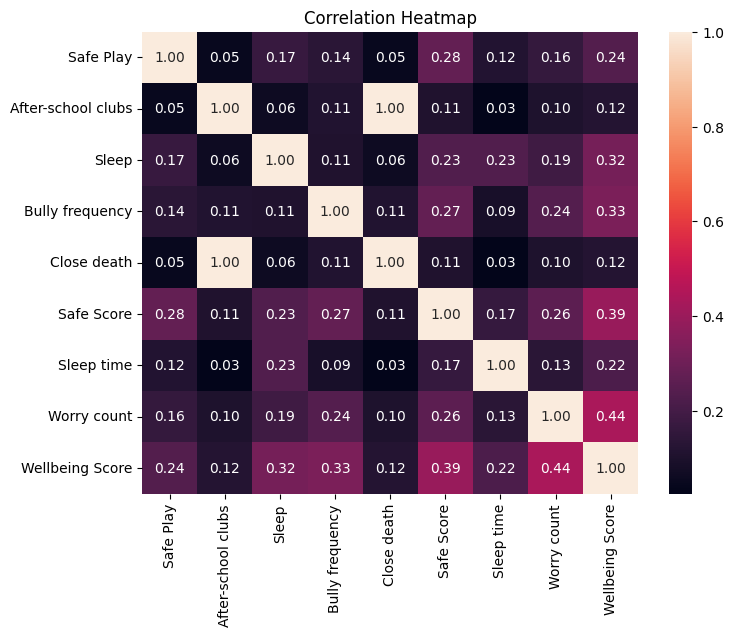

In [131]:
# Compute the correlation matrix
correlation_matrix = full_data.corr().abs()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [132]:
full_data[["Close death", "After-school clubs"]]

Close death  After-school clubs
0              1.0                 1.0
1              0.0                 0.0
2              0.0                 0.0
3              1.0                 1.0
4              1.0                 1.0
...            ...                 ...
34283          0.0                 0.0
34284          0.0                 0.0
34285          1.0                 1.0
34286          0.0                 0.0
34287          0.0                 0.0

[34288 rows x 2 columns]

In [133]:
full_data["Close death"].value_counts()

Close death
0.0    19662
1.0    14579
Name: count, dtype: int64

In [135]:
full_data["After-school clubs"].value_counts()

After-school clubs
0.0    19662
1.0    14579
Name: count, dtype: int64

IndexError: index 8 is out of bounds for axis 0 with size 8

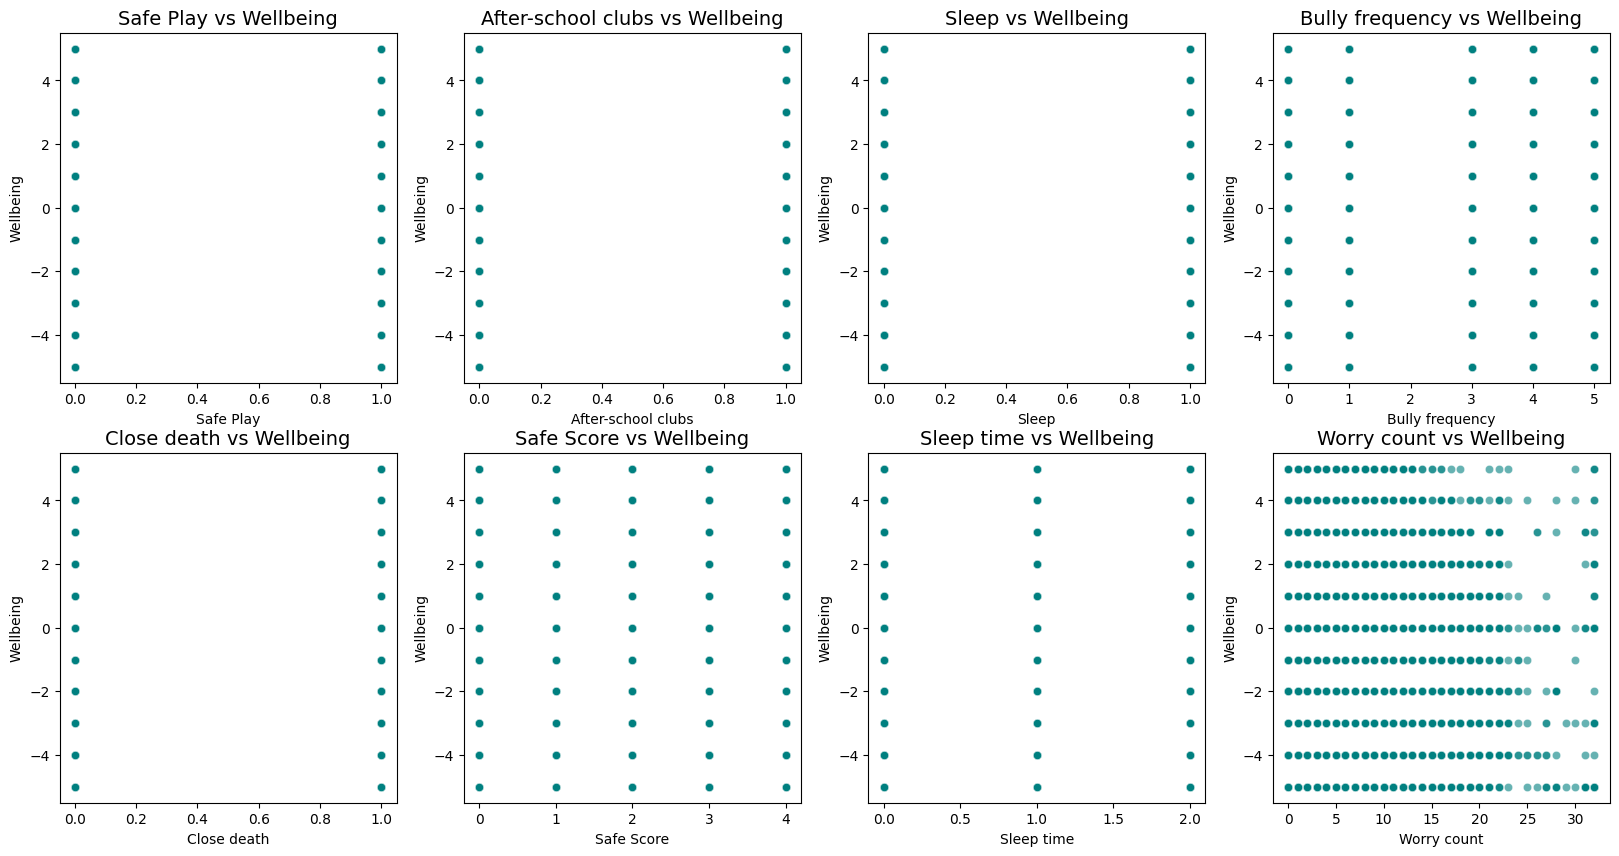

In [129]:

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
 
 
for i, question in enumerate(full_data.columns):
    sns.scatterplot(x=full_data[question], y=full_data['Wellbeing Score'], ax=axes[i], color='teal', alpha=0.6)
    axes[i].set_title(f'{question} vs Wellbeing', fontsize=14)
    axes[i].set_xlabel(question)
    axes[i].set_ylabel('Wellbeing')
 
 
axes[7].axis('off')
 
plt.tight_layout()
plt.show()

In [136]:
df

header_1 No Group                                       \
header_2 header_2 hashed_id school_classification_list   
0              27   'b94e5'                    Primary   
1              28   '1a6a8'                    Primary   
2              29   'ef5ed'                    Primary   
3              30   '1b1f1'                    Primary   
4              31   '503d7'                  Secondary   
...           ...       ...                        ...   
34283       41238   'c9f7e'                    Primary   
34284       41239   '57fa4'                    Primary   
34285       41240   '89e5f'                    Primary   
34286       41241   '13d4d'                    Primary   
34287       41242   '2637a'                    Primary   

header_1                                               \
header_2 school_local_authority_filter_classification   
0                                               Leeds   
1                                               Leeds   
2                                               Leeds   
3                                               Leeds   
4                                               Leeds   
...                                               ...   
34283                                        National   
34284                                        National   
34285                                        National   
34286                                        National   
34287                                        National   

header_1                                                           \
header_2 questionnaire_login_year_group_name What is your gender?   
0                                     Year 6           Boy / Male   
1                                     Year 6        Girl / Female   
2                                     Year 6           Boy / Male   
3                                     Year 6           Boy / Male   
4                                     Year 9           Boy / Male   
...                                      ...                  ...   
34283                                 Year 6        Girl / Female   
34284                                 Year 6           Boy / Male   
34285                                 Year 6           Boy / Male   
34286                                 Year 6        Girl / Female   
34287                                 Year 6           Boy / Male   

header_1                                                                       \
header_2 Is your gender identity the same gender you were assigned at birth?    
0                                                       NaN                     
1                                                       NaN                     
2                                                       NaN                     
3                                                       NaN                     
4                                                       NaN                     
...                                                     ...                     
34283                                                   NaN                     
34284                                                   NaN                     
34285                                                   NaN                     
34286                                                   NaN                     
34287                                                   NaN                     

header_1                                               \
header_2 How would you describe your sexual identity?   
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                        Heterosexual   
...                                               ...   
34283                                             NaN   
34284                                 

In [138]:
afterclubs = findq("In the last 12 months, have you attended an active after-school club?")

In [141]:
afterclubs = afterclubs.replace({"Yes": 1, "No": 0})
afterclubs

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\1684794079.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



header_1  Has PE encouraged you to do any of the following '.?
0                                                       0.0   
1                                                       0.0   
2                                                       0.0   
3                                                       1.0   
4                                                       0.0   
...                                                     ...   
34283                                                   0.0   
34284                                                   1.0   
34285                                                   1.0   
34286                                                   0.0   
34287                                                   0.0   

[34288 rows x 1 columns]

In [148]:
full_data["After-school clubs"] = afterclubs

In [144]:
close = findq("Within the last 12 months, has anyone close to you died?")
close.value_counts()

Do you help to look after somebody in your family because they?
No                                                                 19662
Yes                                                                14579
Name: count, dtype: int64

In [145]:
afterclubs.count()

header_1
Has PE encouraged you to do any of the following '.?    32610
dtype: int64

In [146]:
close.replace({"Yes": 1, "No": 0}, inplace=True)
full_data["Close death"] = close


C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\2642533336.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\2642533336.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
full_data.drop("After-school Clubs", axis=1, inplace=True)

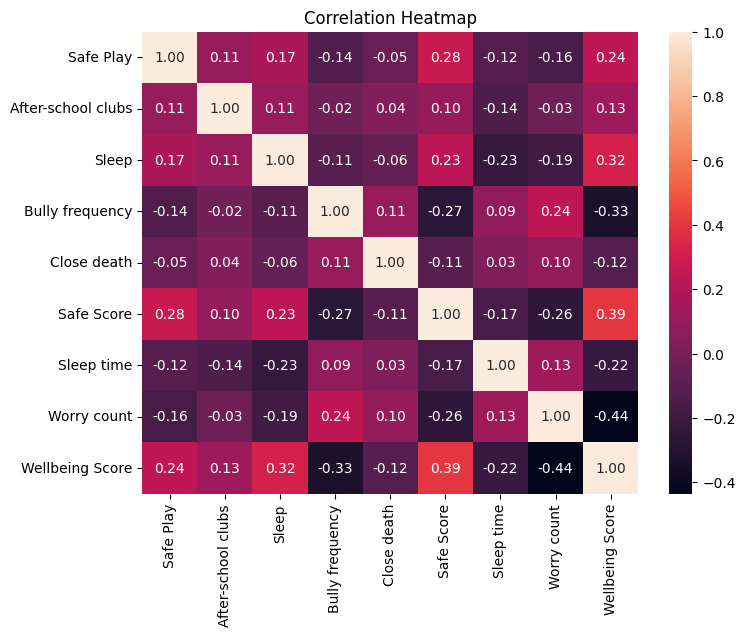

In [369]:
# Compute the correlation matrix
correlation_matrix = full_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.color_palette("crest", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")#, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
 
classifier = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)
 
classifier.fit(X_train, y_train)
 
dt_y_pred = classifier.predict(X_test)
 
print(f"Precision Score {precision_score(y_test, dt_y_pred, zero_division=np.nan, average="weighted"):.4f}")
print(f"Recall Score {recall_score(y_test, dt_y_pred, zero_division=np.nan, average="weighted"):.4f}")

Precision Score 0.2078
Recall Score 0.2085


In [158]:
import graphviz
from sklearn.tree import export_graphviz

In [159]:
dot_file = export_graphviz(classifier, feature_names = ['Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency', 'Close death', 'Safe Score', 'Sleep time', 'Worry count'])


In [160]:
graph = graphviz.Source(dot_file)

In [162]:
graph.render(filename=r"tree_1", format="png", cleanup=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [163]:
from sklearn.tree import plot_tree

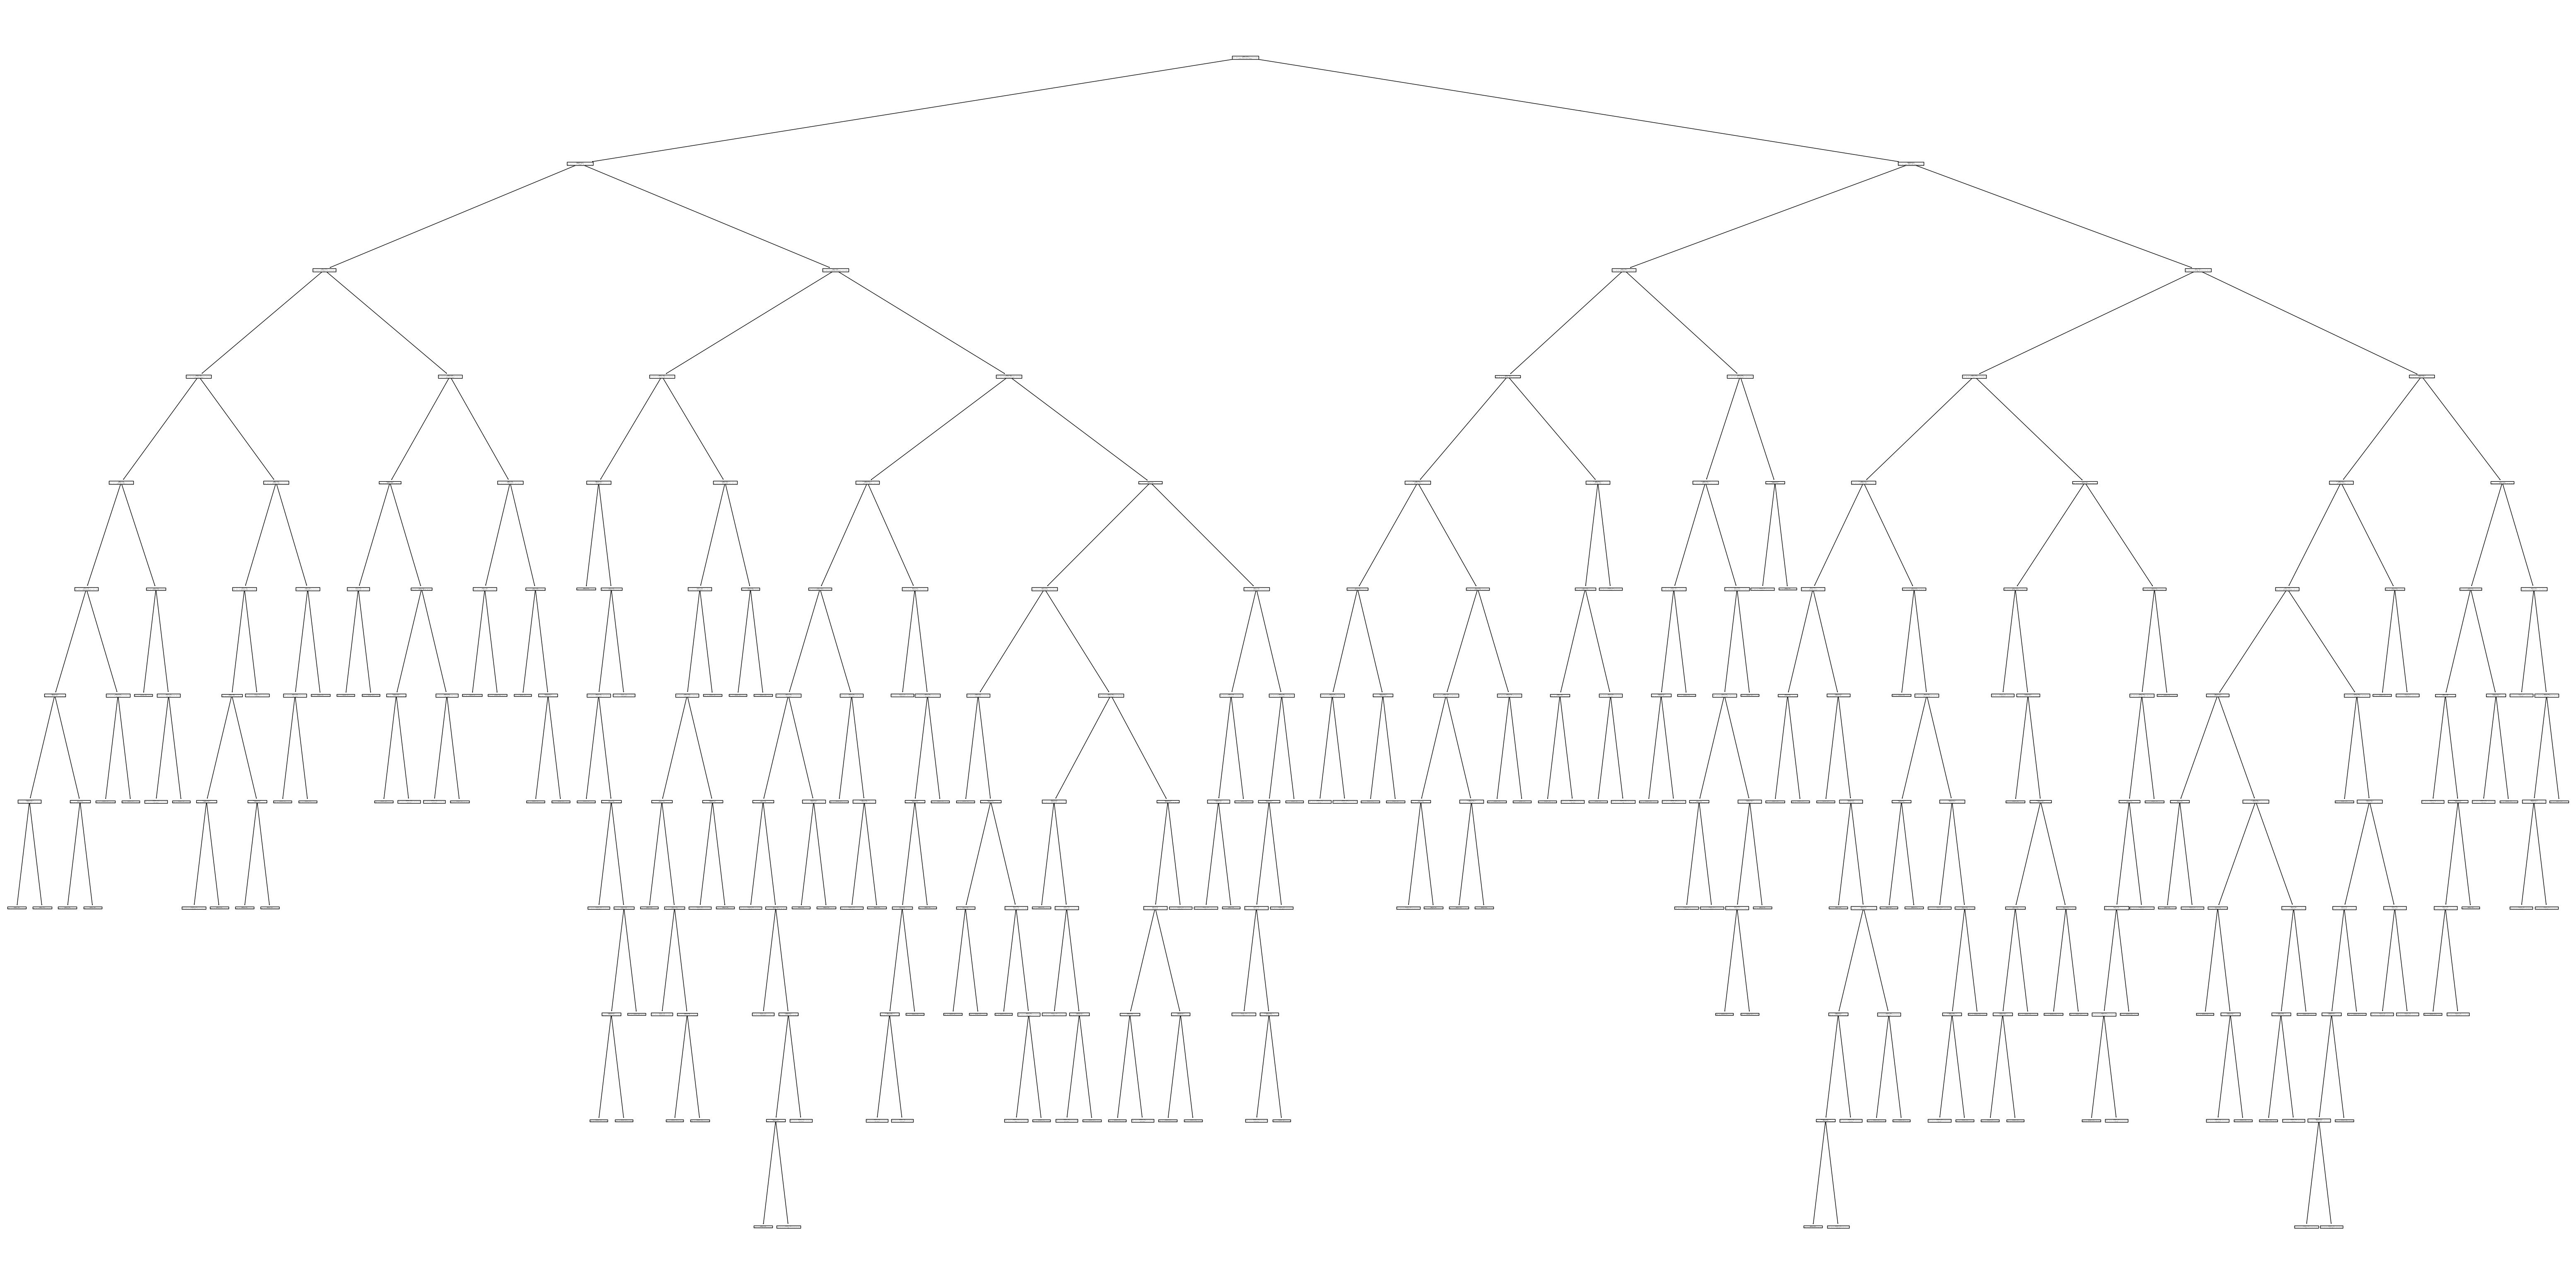

<Figure size 640x480 with 0 Axes>

'hello'

In [387]:
plt.figure(figsize=(80,40)) 
plot_tree(classifier, feature_names=['Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency', 'Close death', 'Safe Score', 'Sleep time', 'Worry count'])
plt.show()
plt.savefig('foo.png')
plt.show()
"hello"

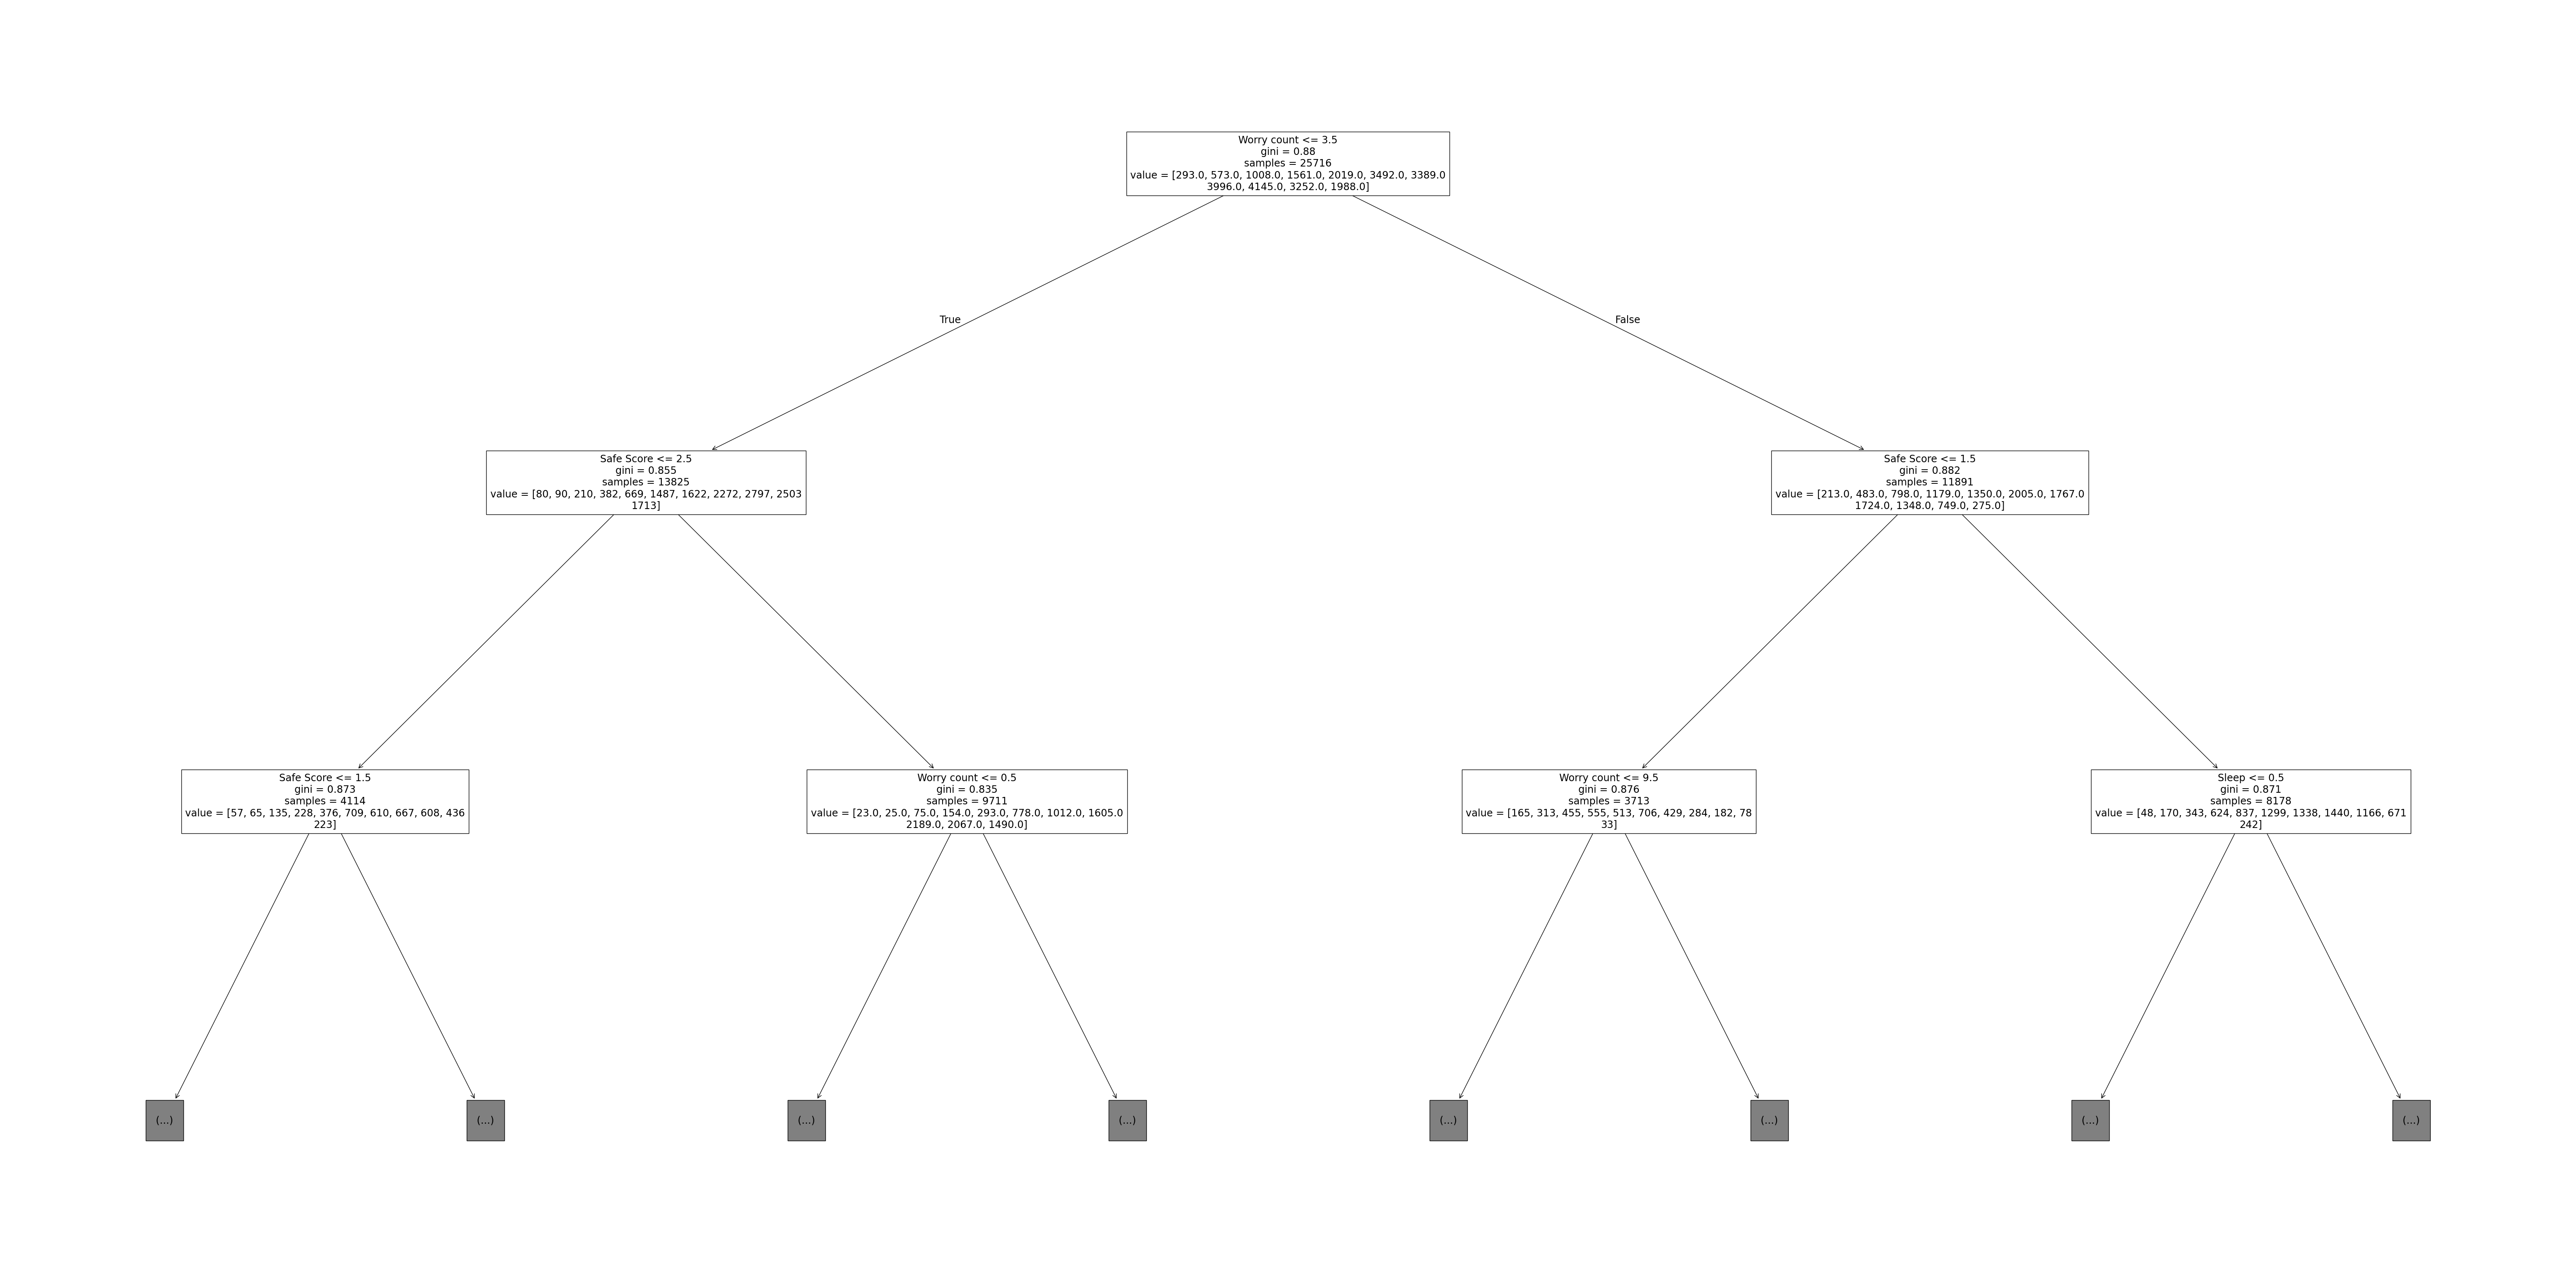

In [391]:
plt.figure(figsize=(80,40)) 
plot_tree(classifier, max_depth=2 ,feature_names=['Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency', 'Close death', 'Safe Score', 'Sleep time', 'Worry count'])
plt.show()

In [169]:
full_data

Safe Play  After-school clubs  Sleep  Bully frequency  Close death  \
0            1.0                 0.0    1.0              0.0          1.0   
1            1.0                 0.0    1.0              0.0          0.0   
2            1.0                 0.0    1.0              0.0          0.0   
3            1.0                 1.0    1.0              0.0          1.0   
4            1.0                 0.0    0.0              0.0          1.0   
...          ...                 ...    ...              ...          ...   
34283        1.0                 0.0    0.0              0.0          0.0   
34284        1.0                 1.0    1.0              3.0          0.0   
34285        1.0                 1.0    1.0              1.0          1.0   
34286        0.0                 0.0    1.0              0.0          0.0   
34287        1.0                 0.0    1.0              0.0          0.0   

       Safe Score  Sleep time  Worry count  Wellbeing Score  
0             4.0         2.0            1              1.0  
1             3.0         0.0            2              3.0  
2             1.0         2.0            5              1.0  
3             4.0         1.0            3              2.0  
4             0.0         2.0            2              0.0  
...           ...         ...          ...              ...  
34283         0.0         1.0            6              0.0  
34284         2.0         1.0            4             -1.0  
34285         4.0         1.0            1              2.0  
34286         3.0         2.0            4              4.0  
34287         4.0         2.0            0              5.0  

[34288 rows x 9 columns]

In [372]:
X = full_data[['Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency', 'Close death', 'Safe Score', 'Sleep time', 'Worry count']].values
y = full_data["Wellbeing Score"].values

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
 
classifier_cut = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)
 
classifier_cut.fit(X_train, y_train)
 
dt_y_pred2 = classifier_cut.predict(X_test)
 
print(f"Precision Score {precision_score(y_test, dt_y_pred2, zero_division=np.nan, average="weighted"):.4f}")
print(f"Recall Score {recall_score(y_test, dt_y_pred2, zero_division=np.nan, average="weighted"):.4f}")

Precision Score 0.2049
Recall Score 0.2047


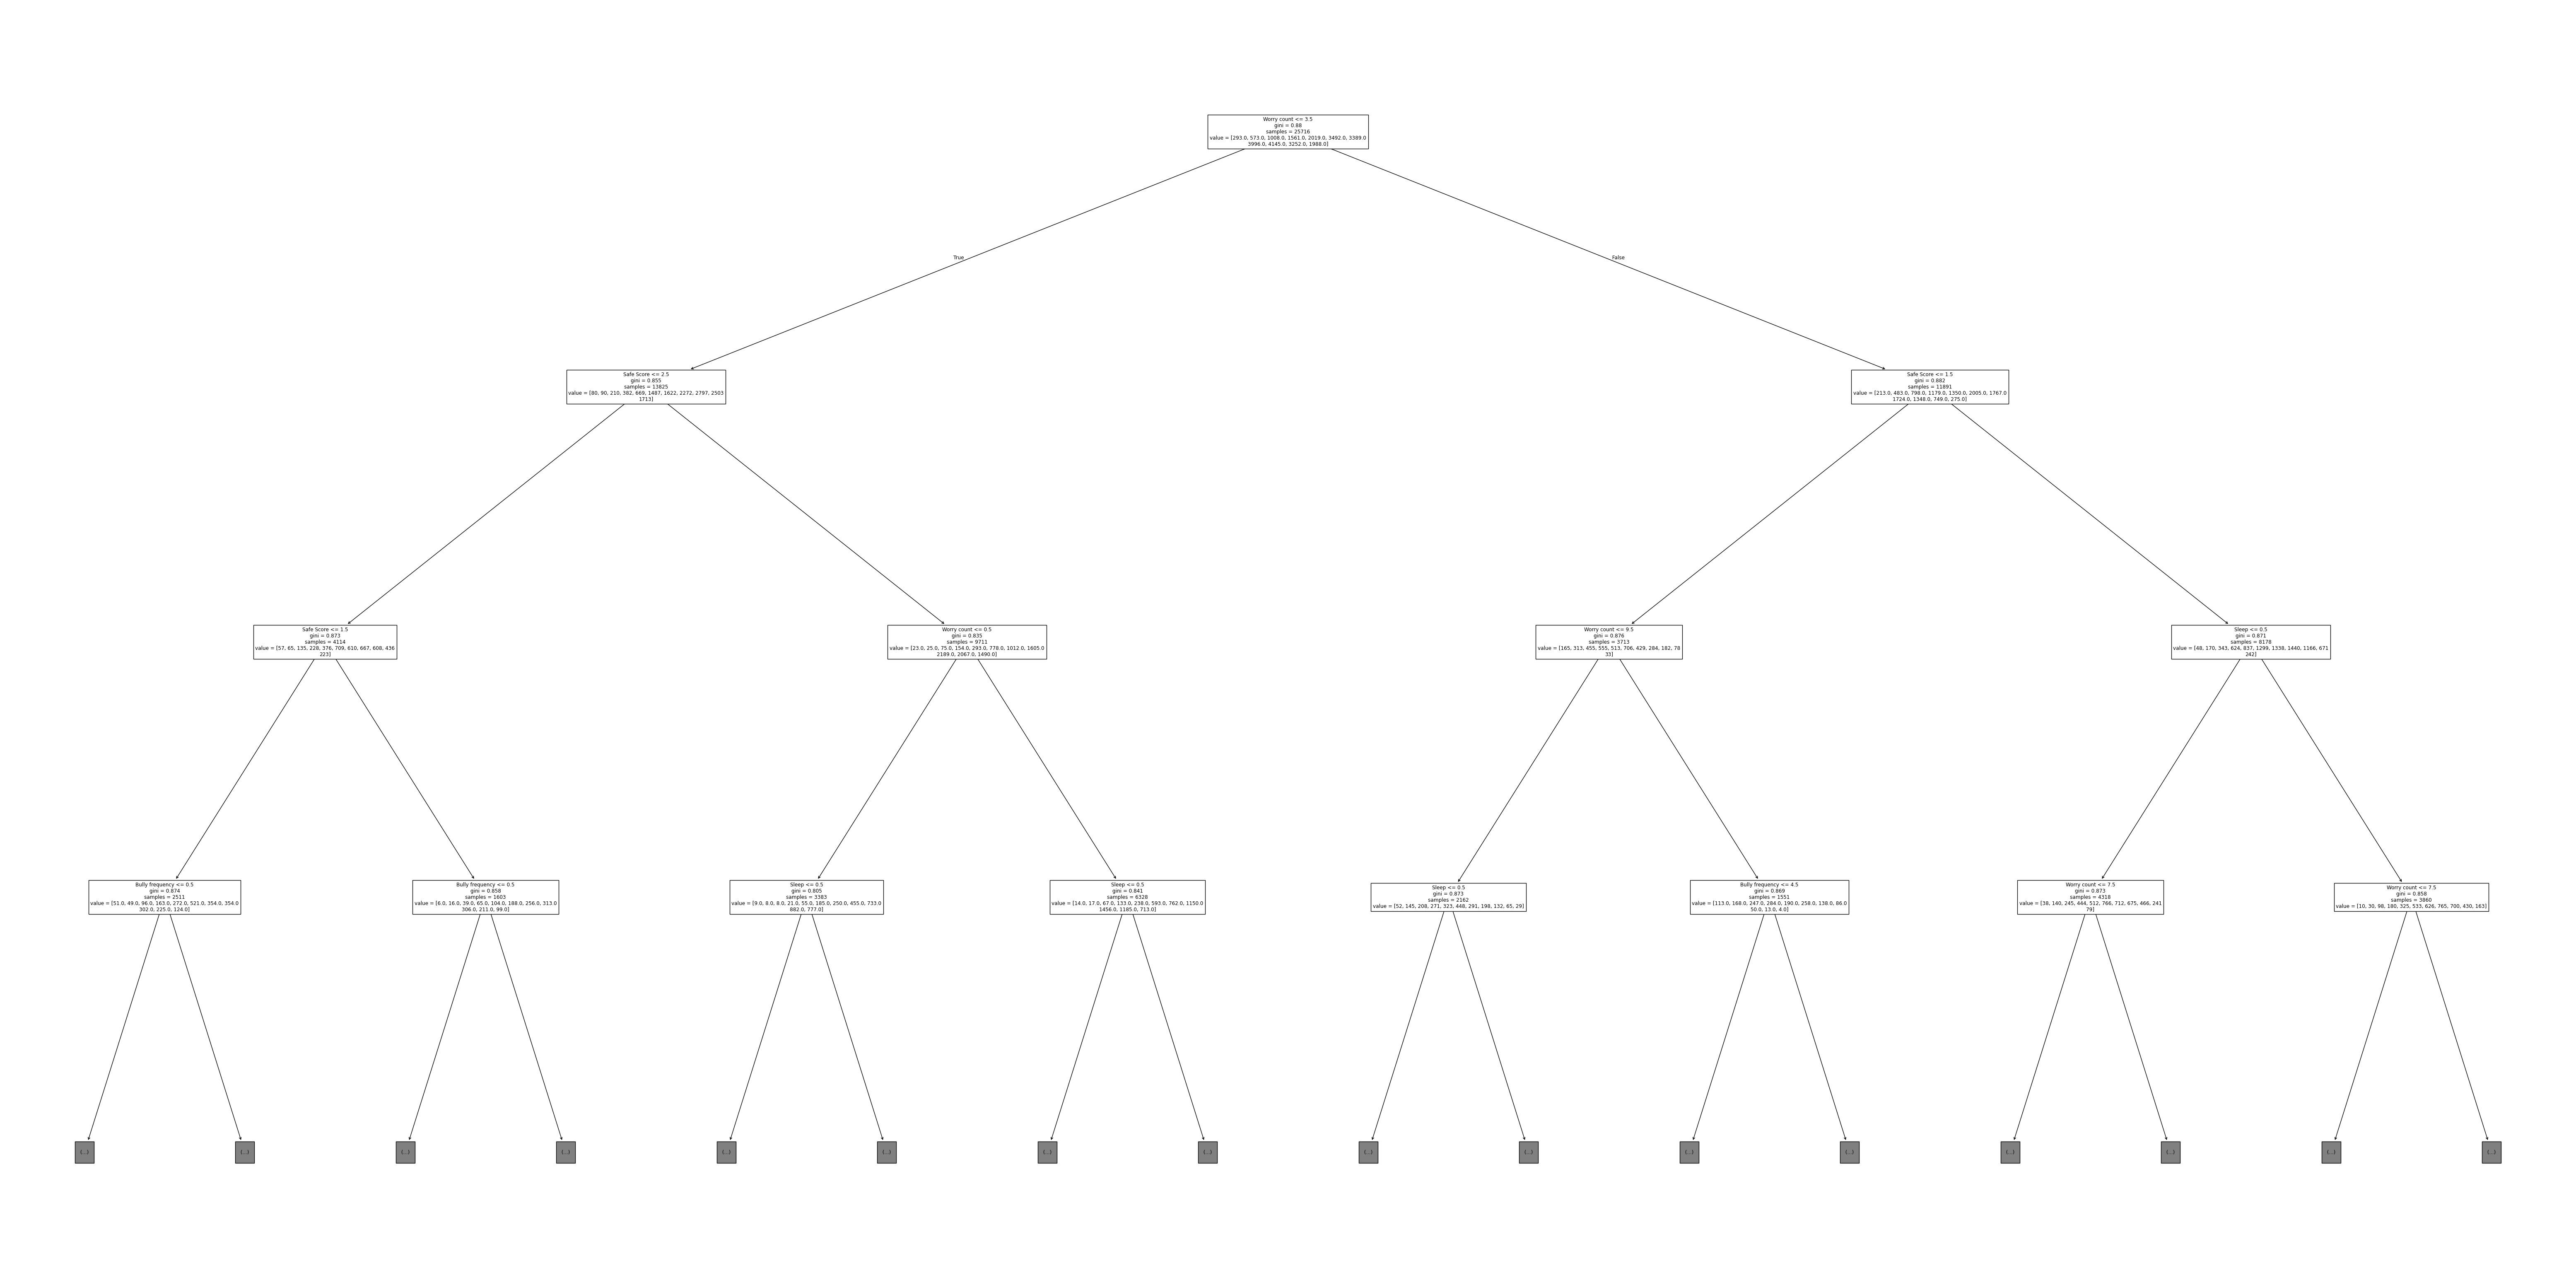

In [172]:
plt.figure(figsize=(80,40)) 
plot_tree(classifier, max_depth=3 ,feature_names=['Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency', 'Close death', 'Safe Score', 'Sleep time', 'Worry count'])
plt.show()

In [173]:
feat_importance = classifier.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.00105368 0.00061269 0.00459725 0.00498423 0.00048084 0.01153018
 0.00223899 0.01960916]


In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
 
regressor = DecisionTreeRegressor(min_samples_leaf=50, random_state=42)
 
regressor.fit(X_train, y_train)
 
y_pred = regressor.predict(X_test)
 
rmse = pow(mean_squared_error(y_test, y_pred), 1/2)
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 1.9075


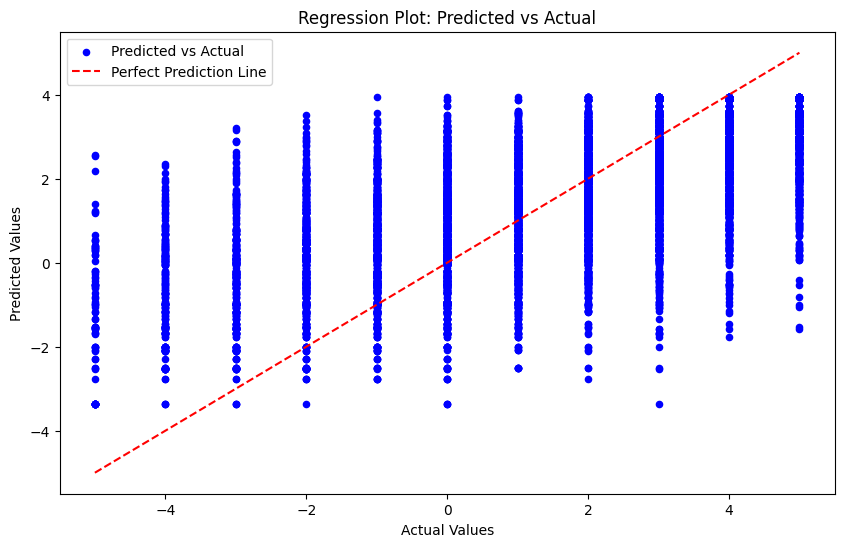

In [383]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', s=20)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot: Predicted vs Actual')
plt.legend()
plt.show()

In [178]:
full_data

Safe Play  After-school clubs  Sleep  Bully frequency  Close death  \
0            1.0                 0.0    1.0              0.0          1.0   
1            1.0                 0.0    1.0              0.0          0.0   
2            1.0                 0.0    1.0              0.0          0.0   
3            1.0                 1.0    1.0              0.0          1.0   
4            1.0                 0.0    0.0              0.0          1.0   
...          ...                 ...    ...              ...          ...   
34283        1.0                 0.0    0.0              0.0          0.0   
34284        1.0                 1.0    1.0              3.0          0.0   
34285        1.0                 1.0    1.0              1.0          1.0   
34286        0.0                 0.0    1.0              0.0          0.0   
34287        1.0                 0.0    1.0              0.0          0.0   

       Safe Score  Sleep time  Worry count  Wellbeing Score  
0             4.0         2.0            1              1.0  
1             3.0         0.0            2              3.0  
2             1.0         2.0            5              1.0  
3             4.0         1.0            3              2.0  
4             0.0         2.0            2              0.0  
...           ...         ...          ...              ...  
34283         0.0         1.0            6              0.0  
34284         2.0         1.0            4             -1.0  
34285         4.0         1.0            1              2.0  
34286         3.0         2.0            4              4.0  
34287         4.0         2.0            0              5.0  

[34288 rows x 9 columns]

In [179]:
issue_test = full_data.copy(deep=True)

In [183]:
issue_test["Issue?"] = issue_test["Wellbeing Score"] < 1
issue_test

Safe Play  After-school clubs  Sleep  Bully frequency  Close death  \
0            1.0                 0.0    1.0              0.0          1.0   
1            1.0                 0.0    1.0              0.0          0.0   
2            1.0                 0.0    1.0              0.0          0.0   
3            1.0                 1.0    1.0              0.0          1.0   
4            1.0                 0.0    0.0              0.0          1.0   
...          ...                 ...    ...              ...          ...   
34283        1.0                 0.0    0.0              0.0          0.0   
34284        1.0                 1.0    1.0              3.0          0.0   
34285        1.0                 1.0    1.0              1.0          1.0   
34286        0.0                 0.0    1.0              0.0          0.0   
34287        1.0                 0.0    1.0              0.0          0.0   

       Safe Score  Sleep time  Worry count  Wellbeing Score  Issue?  
0             4.0         2.0            1              1.0   False  
1             3.0         0.0            2              3.0   False  
2             1.0         2.0            5              1.0   False  
3             4.0         1.0            3              2.0   False  
4             0.0         2.0            2              0.0    True  
...           ...         ...          ...              ...     ...  
34283         0.0         1.0            6              0.0    True  
34284         2.0         1.0            4             -1.0    True  
34285         4.0         1.0            1              2.0   False  
34286         3.0         2.0            4              4.0   False  
34287         4.0         2.0            0              5.0   False  

[34288 rows x 10 columns]

In [185]:
issue_test["Issue?"].value_counts()

Issue?
False    22372
True     11916
Name: count, dtype: int64

In [186]:
issue_test["Issue?"].replace({True: 1, False: 0}, inplace=True)

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\998948101.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\998948101.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [187]:
issue_test

Safe Play  After-school clubs  Sleep  Bully frequency  Close death  \
0            1.0                 0.0    1.0              0.0          1.0   
1            1.0                 0.0    1.0              0.0          0.0   
2            1.0                 0.0    1.0              0.0          0.0   
3            1.0                 1.0    1.0              0.0          1.0   
4            1.0                 0.0    0.0              0.0          1.0   
...          ...                 ...    ...              ...          ...   
34283        1.0                 0.0    0.0              0.0          0.0   
34284        1.0                 1.0    1.0              3.0          0.0   
34285        1.0                 1.0    1.0              1.0          1.0   
34286        0.0                 0.0    1.0              0.0          0.0   
34287        1.0                 0.0    1.0              0.0          0.0   

       Safe Score  Sleep time  Worry count  Wellbeing Score  Issue?  
0             4.0         2.0            1              1.0       0  
1             3.0         0.0            2              3.0       0  
2             1.0         2.0            5              1.0       0  
3             4.0         1.0            3              2.0       0  
4             0.0         2.0            2              0.0       1  
...           ...         ...          ...              ...     ...  
34283         0.0         1.0            6              0.0       1  
34284         2.0         1.0            4             -1.0       1  
34285         4.0         1.0            1              2.0       0  
34286         3.0         2.0            4              4.0       0  
34287         4.0         2.0            0              5.0       0  

[34288 rows x 10 columns]

In [188]:
X = issue_test[['Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency', 'Close death', 'Safe Score', 'Sleep time', 'Worry count']].values
y = issue_test["Issue?"].values

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
 
bin_classifier = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)
 
bin_classifier.fit(X_train, y_train)
 
dt_y_pred_b = bin_classifier.predict(X_test)
 
print(f"Precision Score {precision_score(y_test, dt_y_pred_b):.4f}")
print(f"Recall Score {recall_score(y_test, dt_y_pred_b):.4f}")

Precision Score 0.6801
Recall Score 0.5067


In [392]:
bin_classifier

DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

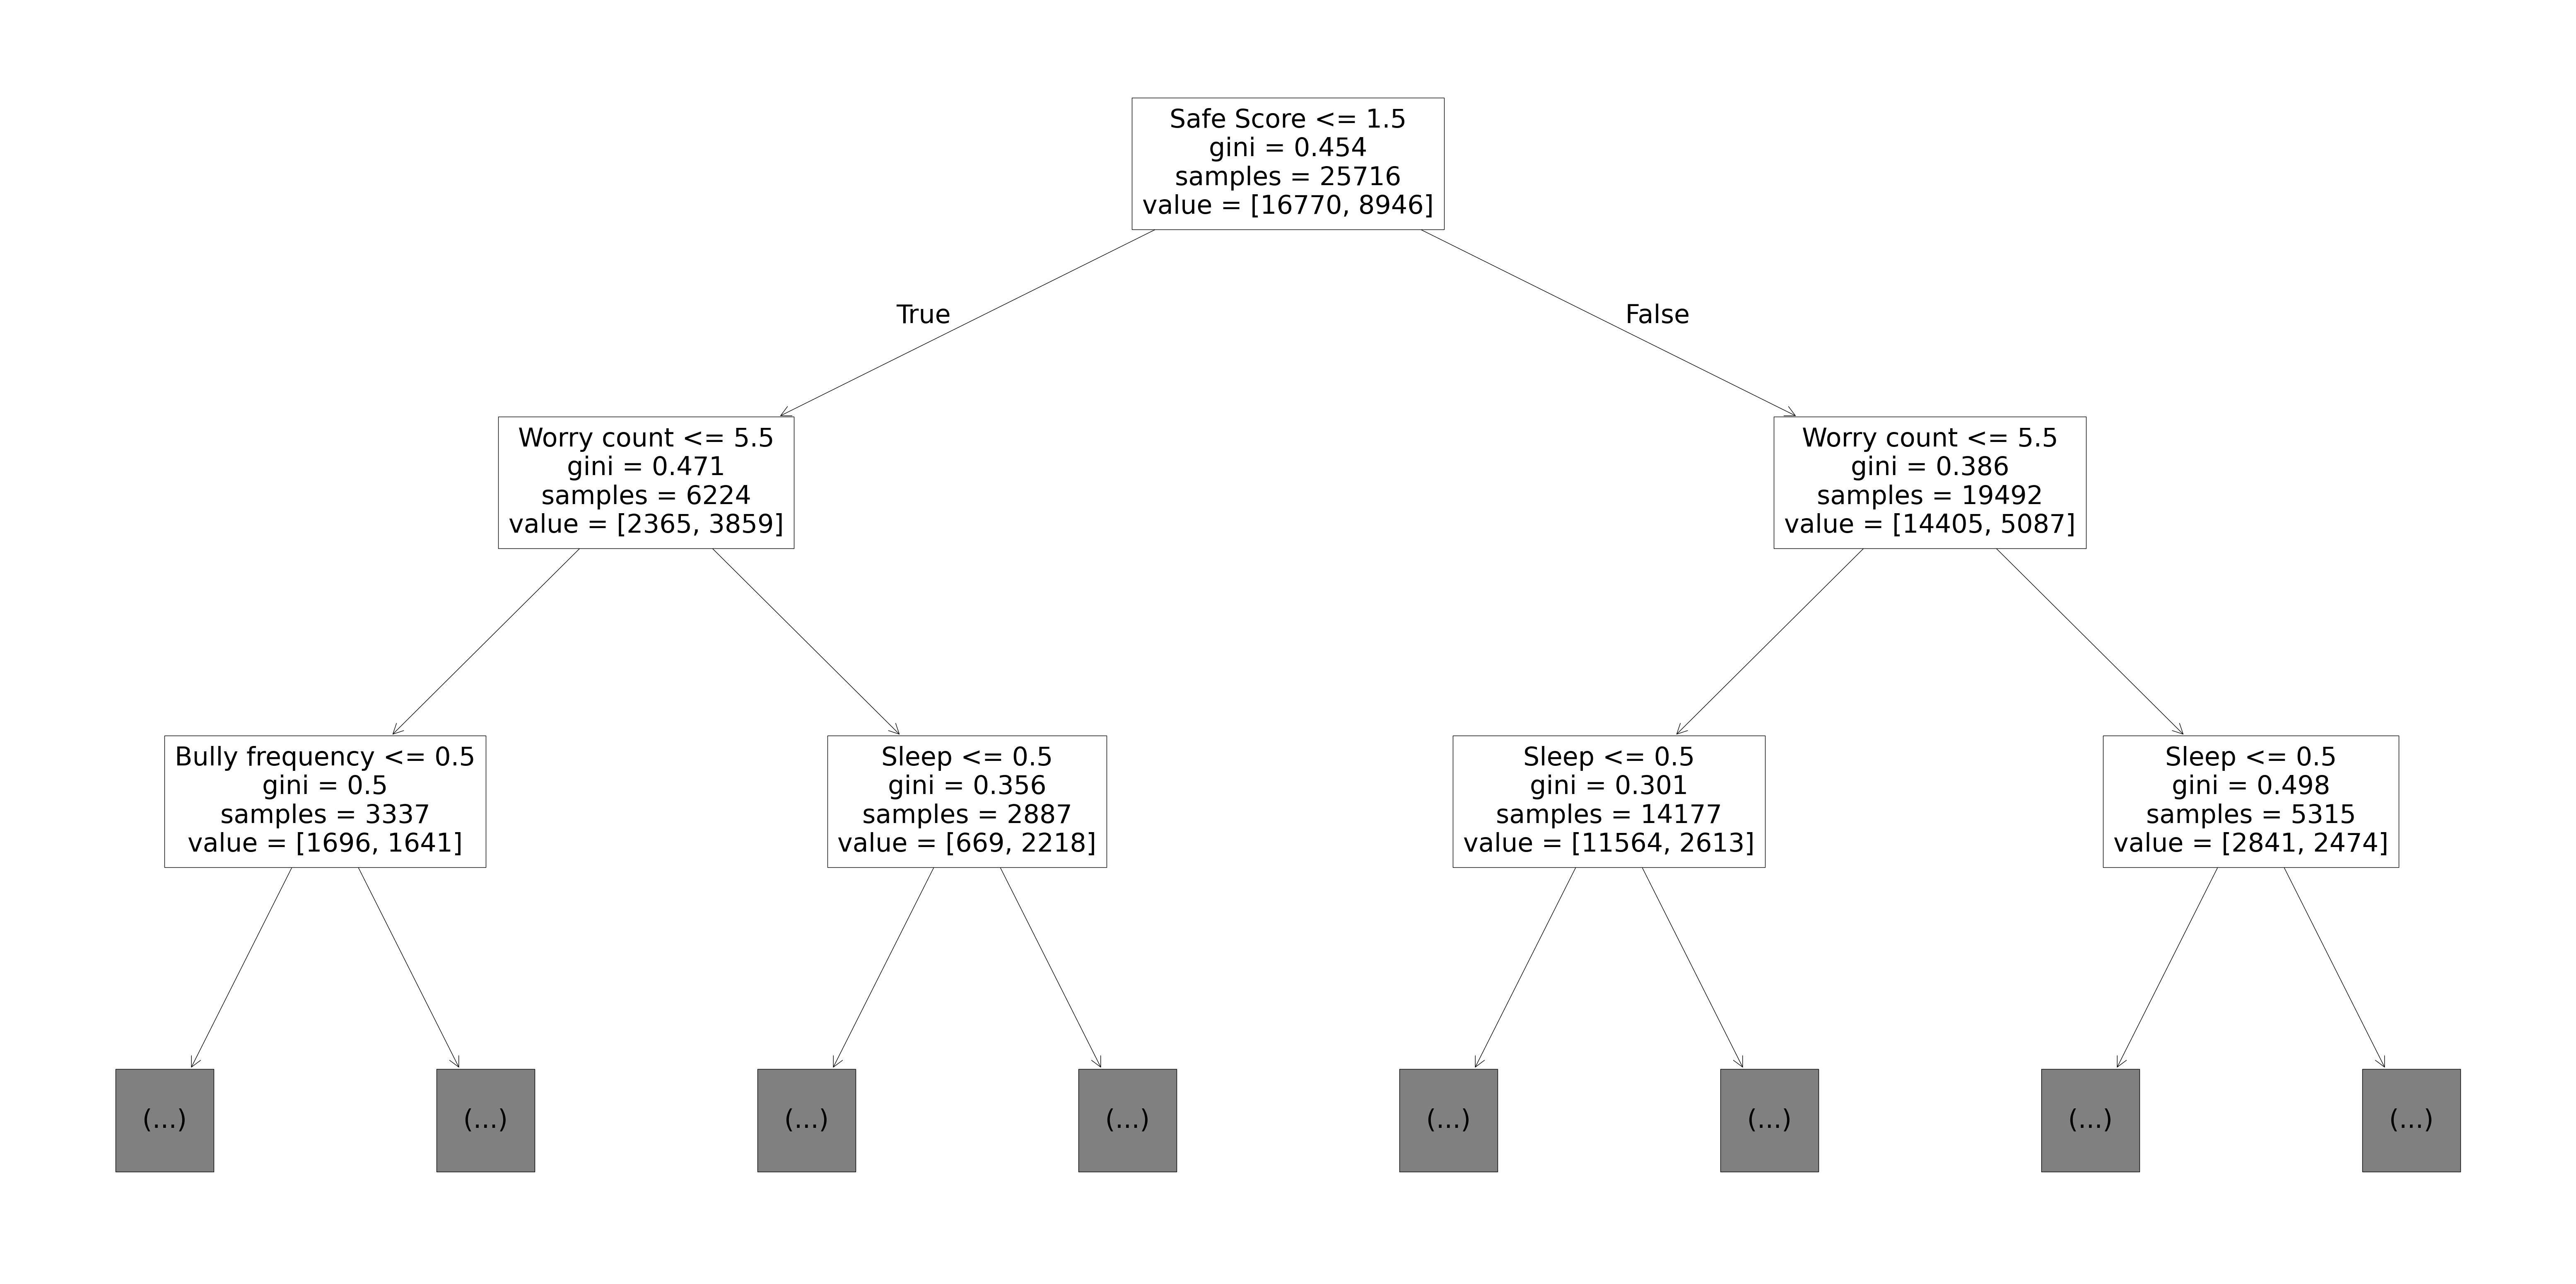

In [397]:
plt.figure(figsize=(80,40)) 
plot_tree(bin_classifier, max_depth=2 ,feature_names=['Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency', 'Close death', 'Safe Score', 'Sleep time', 'Worry count'])
plt.show()

In [192]:
y_test

array([0, 0, 0, ..., 0, 0, 0], shape=(8572,))

In [196]:
y_test.count_nonzero()

AttributeError: 'numpy.ndarray' object has no attribute 'count_nonzero'

In [197]:
import collections
collections.Counter(y_test)

Counter({np.int64(0): 5602, np.int64(1): 2970})

In [199]:
y = full_data["Wellbeing Score"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
collections.Counter(y_test)

Counter({np.float64(3.0): 1376,
         np.float64(2.0): 1346,
         np.float64(0.0): 1130,
         np.float64(4.0): 1118,
         np.float64(1.0): 1108,
         np.float64(-1.0): 693,
         np.float64(5.0): 654,
         np.float64(-2.0): 529,
         np.float64(-3.0): 318,
         np.float64(-4.0): 214,
         np.float64(-5.0): 86})

In [200]:
collections.Counter(dt_y_pred)

Counter({np.float64(3.0): 2155,
         np.float64(0.0): 1934,
         np.float64(2.0): 1500,
         np.float64(4.0): 985,
         np.float64(1.0): 906,
         np.float64(-2.0): 319,
         np.float64(5.0): 279,
         np.float64(-1.0): 238,
         np.float64(-3.0): 168,
         np.float64(-5.0): 52,
         np.float64(-4.0): 36})

In [204]:
calc_difs = np.array([[*y_test], [*dt_y_pred]])

In [206]:
calc_difs

array([[ 1.,  3.,  2., ...,  2.,  1.,  2.],
       [ 2.,  3.,  0., ..., -2.,  2.,  3.]], shape=(2, 8572))

In [208]:
diffs = np.diff(calc_difs, axis=0)
diffs

array([[ 1.,  0., -2., ..., -4.,  1.,  1.]], shape=(1, 8572))

In [211]:
collections.Counter(abs(*diffs))

Counter({np.float64(1.0): 2836,
         np.float64(2.0): 2014,
         np.float64(0.0): 1787,
         np.float64(3.0): 1084,
         np.float64(4.0): 512,
         np.float64(5.0): 246,
         np.float64(6.0): 65,
         np.float64(7.0): 22,
         np.float64(8.0): 3,
         np.float64(9.0): 3})

In [212]:
issue_test.to_csv("mental_data.csv")

In [213]:
(1787 + 2836) / 8572

0.5393140457302846

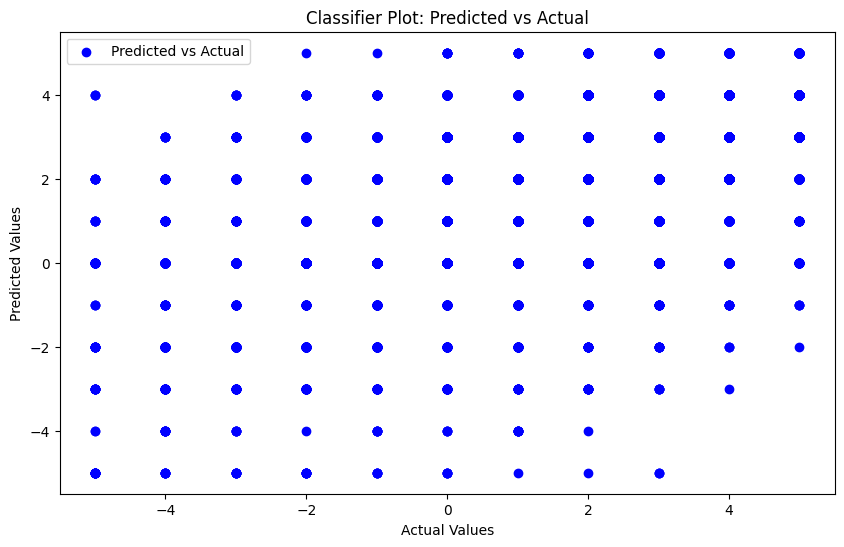

In [215]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred, color='blue', label='Predicted vs Actual')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Classifier Plot: Predicted vs Actual')
plt.legend()
plt.show()

In [217]:
class_preds = [y_test, dt_y_pred]
class_preds

[array([1., 3., 2., ..., 2., 1., 2.], shape=(8572,)),
 array([ 2.,  3.,  0., ..., -2.,  2.,  3.], shape=(8572,))]

In [224]:
coords = [f"{int(i)}, {int(j)}" for i, j in zip(y_test, dt_y_pred)]
coords

['1, 2',
 '3, 3',
 '2, 0',
 '1, 3',
 '1, 3',
 '2, 2',
 '-3, 2',
 '0, 1',
 '3, 0',
 '3, 3',
 '0, 0',
 '4, 3',
 '2, 2',
 '2, 0',
 '3, 2',
 '5, 2',
 '0, 1',
 '2, 0',
 '-1, 2',
 '3, 0',
 '1, 1',
 '5, 0',
 '0, 3',
 '2, 3',
 '1, 3',
 '-1, 0',
 '1, 0',
 '4, 3',
 '0, 0',
 '3, 3',
 '-1, 0',
 '1, 0',
 '5, 2',
 '1, 1',
 '1, 0',
 '1, 0',
 '4, 3',
 '2, 0',
 '2, 2',
 '-2, 2',
 '3, 3',
 '-4, -4',
 '4, 3',
 '2, 2',
 '2, 0',
 '3, 3',
 '0, -2',
 '1, -1',
 '2, 1',
 '3, 0',
 '1, 1',
 '3, 2',
 '5, 3',
 '-5, 0',
 '0, 4',
 '-1, -1',
 '3, 1',
 '3, 4',
 '1, 3',
 '3, 3',
 '-3, -1',
 '0, 1',
 '-1, -2',
 '4, 1',
 '-1, 0',
 '4, 3',
 '3, 3',
 '3, 3',
 '2, 2',
 '3, 1',
 '4, 2',
 '-3, -1',
 '1, 2',
 '-4, -4',
 '2, 5',
 '1, 2',
 '-1, 1',
 '5, 5',
 '3, 5',
 '5, 4',
 '3, 2',
 '5, 3',
 '2, 3',
 '-2, 2',
 '1, 2',
 '4, 5',
 '-1, 2',
 '2, 2',
 '2, 2',
 '3, 2',
 '4, 2',
 '4, 3',
 '2, 3',
 '0, 0',
 '4, 2',
 '4, 3',
 '-1, 1',
 '-2, 3',
 '0, 2',
 '0, 0',
 '1, 1',
 '3, 2',
 '5, 3',
 '3, 3',
 '1, 1',
 '4, 5',
 '4, 5',
 '-5, -5',


In [225]:
collections.Counter(coords)

Counter({'3, 3': 497,
         '4, 3': 415,
         '2, 3': 397,
         '0, 0': 394,
         '2, 2': 290,
         '1, 0': 274,
         '1, 3': 267,
         '2, 0': 264,
         '1, 2': 252,
         '-1, 0': 242,
         '5, 3': 238,
         '3, 2': 234,
         '4, 4': 234,
         '3, 4': 216,
         '0, 2': 203,
         '0, 3': 196,
         '-2, 0': 194,
         '5, 4': 189,
         '3, 0': 187,
         '2, 4': 174,
         '4, 2': 172,
         '0, 1': 152,
         '1, 1': 144,
         '2, 1': 142,
         '3, 1': 139,
         '-1, 2': 123,
         '-3, 0': 121,
         '4, 0': 116,
         '-1, 1': 103,
         '4, 1': 91,
         '-2, 2': 87,
         '5, 5': 83,
         '4, 5': 78,
         '5, 2': 75,
         '-1, 3': 75,
         '3, 5': 71,
         '-4, 0': 71,
         '1, 4': 70,
         '-2, 1': 68,
         '0, 4': 61,
         '-3, -2': 60,
         '-2, -2': 55,
         '-2, 3': 48,
         '-4, -2': 47,
         '-1, -2': 46,
        

In [319]:
class_preds

[array([1., 3., 2., ..., 2., 1., 2.], shape=(8572,)),
 array([ 2.,  3.,  0., ..., -2.,  2.,  3.], shape=(8572,))]

In [321]:
dt_y_pred

array([ 2.,  3.,  0., ..., -2.,  2.,  3.], shape=(8572,))

In [227]:
df[:5]

header_1 No Group                                       \
header_2 header_2 hashed_id school_classification_list   
0              27   'b94e5'                    Primary   
1              28   '1a6a8'                    Primary   
2              29   'ef5ed'                    Primary   
3              30   '1b1f1'                    Primary   
4              31   '503d7'                  Secondary   

header_1                                               \
header_2 school_local_authority_filter_classification   
0                                               Leeds   
1                                               Leeds   
2                                               Leeds   
3                                               Leeds   
4                                               Leeds   

header_1                                                           \
header_2 questionnaire_login_year_group_name What is your gender?   
0                                     Year 6           Boy / Male   
1                                     Year 6        Girl / Female   
2                                     Year 6           Boy / Male   
3                                     Year 6           Boy / Male   
4                                     Year 9           Boy / Male   

header_1                                                                       \
header_2 Is your gender identity the same gender you were assigned at birth?    
0                                                       NaN                     
1                                                       NaN                     
2                                                       NaN                     
3                                                       NaN                     
4                                                       NaN                     

header_1                                               \
header_2 How would you describe your sexual identity?   
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                        Heterosexual   

header_1                                \
header_2 Which of these describes you?   
0                                White   
1                                Asian   
2                                Black   
3                                White   
4               Mixed White and Asian    

header_1                                           ...  \
header_2 Do you consider yourself to be disabled?  ...   
0                                              No  ...   
1                                              No  ...   
2                                              No  ...   
3                                              No  ...   
4                                              No  ...   

header_1 How good do you think your school/college are at dealing with the following?  \
header_2                                                                       Sexism   
0                This is not an issue at our school/college                             
1                                                      Good                             
2                                                Don't know                             
3                                                      Good                             
4                                                Don't know                             

header_1                                              \
header_2                                       Gangs   
0         This is not an issue at our school/college   
1         This is not an issue at our school/college   
2                                         Don't know   
3                                               Good   
4                                         Don't know   

header_1              

In [229]:
years = findq("questionnaire_login_year_group_name")
years.value_counts()

No Group
Year 6      8263
Year 5      7592
Year 9      6056
Year 7      5287
Year 8      1920
Year 11     1868
Year 10     1670
Year 12     1092
Year 13      540
Name: count, dtype: int64

In [230]:
years.replace({f"Year {i}": i for i in range(14)}, inplace=True)
years.value_counts()

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\4179067957.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\4179067957.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



No Group
6           8263
5           7592
9           6056
7           5287
8           1920
11          1868
10          1670
12          1092
13           540
Name: count, dtype: int64

In [234]:
years.describe()

header_1      No Group
count     34288.000000
mean          7.343181
std           2.108241
min           5.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          13.000000

In [236]:
issue_test["Year Group"] = years
issue_test

Safe Play  After-school clubs  Sleep  Bully frequency  Close death  \
0            1.0                 0.0    1.0              0.0          1.0   
1            1.0                 0.0    1.0              0.0          0.0   
2            1.0                 0.0    1.0              0.0          0.0   
3            1.0                 1.0    1.0              0.0          1.0   
4            1.0                 0.0    0.0              0.0          1.0   
...          ...                 ...    ...              ...          ...   
34283        1.0                 0.0    0.0              0.0          0.0   
34284        1.0                 1.0    1.0              3.0          0.0   
34285        1.0                 1.0    1.0              1.0          1.0   
34286        0.0                 0.0    1.0              0.0          0.0   
34287        1.0                 0.0    1.0              0.0          0.0   

       Safe Score  Sleep time  Worry count  Wellbeing Score  Issue?  \
0             4.0         2.0            1              1.0       0   
1             3.0         0.0            2              3.0       0   
2             1.0         2.0            5              1.0       0   
3             4.0         1.0            3              2.0       0   
4             0.0         2.0            2              0.0       1   
...           ...         ...          ...              ...     ...   
34283         0.0         1.0            6              0.0       1   
34284         2.0         1.0            4             -1.0       1   
34285         4.0         1.0            1              2.0       0   
34286         3.0         2.0            4              4.0       0   
34287         4.0         2.0            0              5.0       0   

       Year Group  
0               6  
1               6  
2               6  
3               6  
4               9  
...           ...  
34283           6  
34284           6  
34285           6  
34286           6  
34287           6  

[34288 rows x 11 columns]

In [239]:
gender = findq("What is your gender?")
gender, "\n", gender.value_counts()

(header_1       No Group
 0            Boy / Male
 1         Girl / Female
 2            Boy / Male
 3            Boy / Male
 4            Boy / Male
 ...                 ...
 34283     Girl / Female
 34284        Boy / Male
 34285        Boy / Male
 34286     Girl / Female
 34287        Boy / Male
 
 [34288 rows x 1 columns],
 '\n',
 No Group                                    
 Boy / Male                                      17046
 Girl / Female                                   16121
 I would prefer not to say                         560
 I would describe my gender in some other way      328
 Non-Binary                                        209
 Gender fluid                                       12
 Demi boy                                            7
 Trans male                                          4
 Trans female                                        1
 Name: count, dtype: int64)

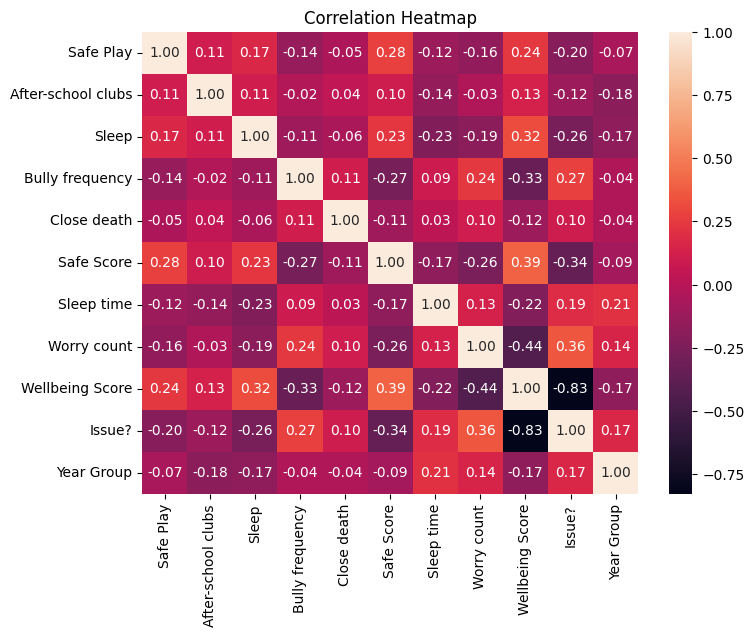

In [246]:
# Compute the correlation matrix
correlation_matrix = issue_test.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [245]:
year_s = [issue_test[issue_test["Year Group"] == n] for n in range(5, 14)]
year_s

[       Safe Play  After-school clubs  Sleep  Bully frequency  Close death  \
 52           1.0                 0.0    1.0              1.0          1.0   
 186          0.0                 1.0    0.0              0.0          1.0   
 187          1.0                 1.0    1.0              0.0          1.0   
 188          0.0                 1.0    0.0              0.0          1.0   
 190          1.0                 1.0    0.0              1.0          0.0   
 ...          ...                 ...    ...              ...          ...   
 34196        1.0                 1.0    0.0              1.0          0.0   
 34197        1.0                 1.0    0.0              1.0          0.0   
 34203        1.0                 1.0    1.0              1.0          0.0   
 34204        1.0                 1.0    1.0              0.0          0.0   
 34207        1.0                 1.0    0.0              0.0          0.0   
 
        Safe Score  Sleep time  Worry count  Wellbeing Score  

In [248]:
issue_data = issue_test 

In [300]:
bar_plot = pd.DataFrame(columns=["Year Group", "Wellbeing Score", "Ratio", "Count"])
#bar_plot.columns = ["Year Group", "Wellbeing Score", "Count"]
for i in range(5, 14):
    year_d = year_s[i-5]
    year_size = len(year_d)
    for w in range(-5,6):
        bar_plot.loc[(i*11)+w] = [i, w, len(year_d[year_d["Wellbeing Score"] == w])/year_size, len(year_d[year_d["Wellbeing Score"] == w])]

bar_plot[-5:]

Year Group  Wellbeing Score     Ratio  Count
144        13.0              1.0  0.146296   79.0
145        13.0              2.0  0.111111   60.0
146        13.0              3.0  0.112963   61.0
147        13.0              4.0  0.064815   35.0
148        13.0              5.0  0.061111   33.0

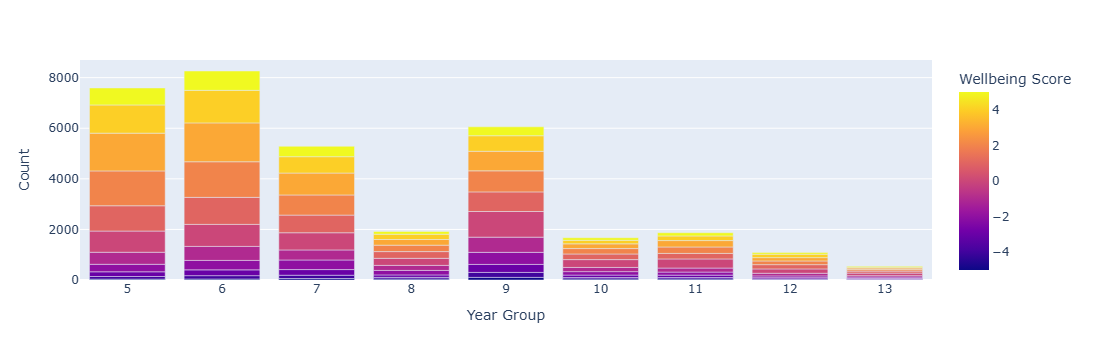

In [318]:
px.bar(bar_plot, x="Year Group", y="Count", color="Wellbeing Score")

In [285]:
bar_plot2 = pd.DataFrame(columns=["Year Group", "Wellbeing Score", "Ratio"])
#bar_plot.columns = ["Year Group", "Wellbeing Score", "Count"]
for i in range(5, 14):
    year_d = year_s[i-5]
    year_size = len(year_d)
    for w in range(-5, 6):
        bar_plot2.loc[(i*11)+w] = [i, w, len(year_d[year_d["Wellbeing Score"] == w])/year_size]

bar_plot[:22]

Year Group  Wellbeing Score     Ratio
50         5.0             -5.0  0.004610
51         5.0             -4.0  0.013435
52         5.0             -3.0  0.024631
53         5.0             -2.0  0.039120
54         5.0             -1.0  0.062698
55         5.0              0.0  0.110379
56         5.0              1.0  0.131718
57         5.0              2.0  0.181507
58         5.0              3.0  0.196523
59         5.0              4.0  0.146997
60         5.0              5.0  0.088383
61         6.0             -5.0  0.004720
62         6.0             -4.0  0.015975
63         6.0             -3.0  0.027835
64         6.0             -2.0  0.045262
65         6.0             -1.0  0.067046
66         6.0              0.0  0.105289
67         6.0              1.0  0.129251
68         6.0              2.0  0.170398
69         6.0              3.0  0.185889
70         6.0              4.0  0.155755
71         6.0              5.0  0.092581

In [279]:
year_10 = year_s[5]
year_10

Safe Play  After-school clubs  Sleep  Bully frequency  Close death  \
3165         0.0                 0.0    0.0              0.0          1.0   
3181         0.0                 0.0    0.0              0.0          1.0   
3199         1.0                 0.0    1.0              5.0          1.0   
3202         1.0                 0.0    0.0              0.0          0.0   
3205         1.0                 0.0    0.0              0.0          0.0   
...          ...                 ...    ...              ...          ...   
33855        0.0                 0.0    1.0              1.0          0.0   
33856        0.0                 1.0    0.0              NaN          0.0   
33858        1.0                 1.0    0.0              0.0          1.0   
33861        0.0                 0.0    0.0              1.0          1.0   
33865        1.0                 0.0    1.0              0.0          0.0   

       Safe Score  Sleep time  Worry count  Wellbeing Score  Issue?  \
3165          2.0         1.0            0              2.0       0   
3181          3.0         0.0            0              4.0       0   
3199          3.0         1.0            6              1.0       0   
3202          3.0         1.0            0              4.0       0   
3205          4.0         1.0            0              5.0       0   
...           ...         ...          ...              ...     ...   
33855         2.0         2.0            8             -5.0       1   
33856         2.0         1.0            7              4.0       0   
33858         4.0         1.0            9              0.0       1   
33861         0.0         2.0            1              3.0       0   
33865         0.0         1.0            1              0.0       1   

       Year Group  
3165           10  
3181           10  
3199           10  
3202           10  
3205           10  
...           ...  
33855          10  
33856          10  
33858          10  
33861          10  
33865          10  

[1670 rows x 11 columns]

In [284]:
len(year_10[year_10["Wellbeing Score"] == 5])/len(year_10)

0.06047904191616767

In [317]:
year_cut_test = issue_data[issue_data["Year Group"] == 8]

X = year_cut_test[['Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency', 'Close death', 'Safe Score', 'Sleep time', 'Worry count', "Year Group"]].values
y = year_cut_test["Issue?"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
 
withyear_classifier = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)
 
withyear_classifier.fit(X_train, y_train)
 
dt_y_pred_w = withyear_classifier.predict(X_test)
 
print(f"Precision Score {precision_score(y_test, dt_y_pred_w):.4f}")
print(f"Recall Score {recall_score(y_test, dt_y_pred_w):.4f}")

Precision Score 0.7602
Recall Score 0.6507


In [ ]:

feature_names = [
    'Safe Play', 'After-school clubs', 'Sleep', 'Bully frequency', 'Close death', 'Safe Score', 'Sleep time', 'Worry count', "Year Group",
    "
]

X = year_cut_test[feature_names].values
y = year_cut_test["Issue?"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
 
dt_classifier = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)
 
dt_classifier.fit(X_train, y_train)
 
dt_y_pred = dt_classifier.predict(X_test)
 
print(f"Precision Score {precision_score(y_test, dt_y_pred):.4f}")
print(f"Recall Score {recall_score(y_test, dt_y_pred):.4f}")

# Testing encodin

In [324]:
set(df.columns.get_level_values(0))

{"Do you agree or disagree with the following statement 'My school/college has been good at'.'",
 'Do you ever miss lessons at college if you are not ill?',
 'Do you help to look after somebody in your family because they?',
 'Does anything stop you from taking part in physical activities?',
 "Has PE encouraged you to do any of the following '.?",
 'Have you ever been away from school without telling anyone?',
 'Have you ever felt pressured into having either of the following?',
 'How good do you think your school/college are at dealing with the following?',
 'How happy are you with your opportunities to play…?',
 'How much do you agree or disagree with the following statements?',
 'How much useful information and learning have you had to help you understand the following aspects of British values? (e.g. through lessons at school/college)',
 'How much useful information and learning have you had to help you understand the following things e.g. through lessons at school/college)? ',
 'H

In [326]:
at_schl = findq('In the last 12 months, at your school/college?')

In [335]:
at_schl = at_schl.iloc[:, :-2]

In [336]:
from sklearn.preprocessing import LabelEncoder

In [337]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [347]:
ord = OrdinalEncoder(encoded_missing_value=1)

In [348]:
ord.fit(at_schl)

OrdinalEncoder(encoded_missing_value=1)

In [349]:
ord.transform(at_schl)

array([[0., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]], shape=(34288, 7))

In [350]:
at_schlt = _

In [354]:
ord2 = OrdinalEncoder(categories = ["X"],)

[array(['X', nan], dtype=object),
 array(['X', nan], dtype=object),
 array(['X', nan], dtype=object),
 array(['X', nan], dtype=object),
 array(['X', nan], dtype=object),
 array(['X', nan], dtype=object),
 array(['X', nan], dtype=object)]

In [355]:
at_schlt

array([[0., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]], shape=(34288, 7))

In [357]:
at_schl.replace({np.nan: 0, "X": 1}, inplace=True)

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\2692442584.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\2692442584.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [359]:
at_schl["Activity"] = at_schl.sum(axis=1)
at_schl.describe()

C:\Users\Guest01\AppData\Local\Temp\ipykernel_22788\2971671018.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



header_2  I haven't shared any ideas about improving my school  \
count                                          34288.000000      
mean                                               0.645911      
std                                                0.478243      
min                                                0.000000      
25%                                                0.000000      
50%                                                1.000000      
75%                                                1.000000      
max                                                1.000000      

header_2  I have interviewed staff for jobs at my school/college  \
count                                          34288.000000        
mean                                               0.056580        
std                                                0.231041        
min                                                0.000000        
25%                                                0.000000        
50%                                                0.000000        
75%                                                0.000000        
max                                                1.000000        

header_2  I have voted in the school/student council elections  \
count                                          34288.000000      
mean                                               0.264612      
std                                                0.441133      
min                                                0.000000      
25%                                                0.000000      
50%                                                0.000000      
75%                                                1.000000      
max                                                1.000000      

header_2  I have given ideas to a member of staff  \
count                                34288.000000   
mean                                     0.218706   
std                                      0.413375   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

header_2  I have given ideas to a school/student councillor  \
count                                          34288.000000   
mean                                               0.194179   
std                                                0.395573   
min                                                0.000000   
25%                                                0.000000   
50%                                                0.000000   
75%                                                0.000000   
max                                                1.000000   

header_2  I am on my school/student council  \
count                          34288.000000   
mean                               0.107268   
std                                0.309458   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                1.000000   

header_2  I have done campaigns and projects e.g. anti-bullying, recycling  \
count                                          34288.000000                  
mean                                               0.111030                  
std                                                0.314174                  
min                                                0.000000                  
25%                                                0.000000                  
50%                                                0.000000                  
75%                                                0.000000                  
max                                                1.000000                  

header_2      Activity  

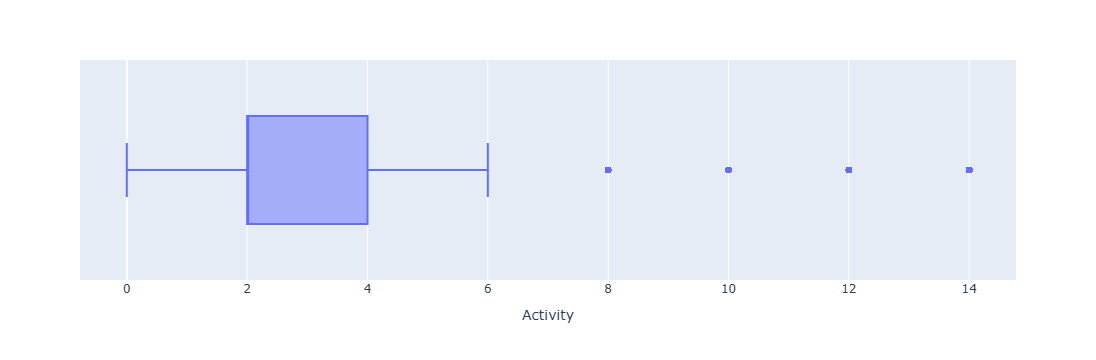

In [360]:
px.box(at_schl, x="Activity")

In [361]:
at_schl[at_schl["Activity"] > 7]

header_2  I haven't shared any ideas about improving my school  \
14                                                        0      
64                                                        0      
110                                                       1      
120                                                       1      
136                                                       1      
...                                                     ...      
34227                                                     0      
34233                                                     0      
34234                                                     0      
34235                                                     0      
34280                                                     1      

header_2  I have interviewed staff for jobs at my school/college  \
14                                                        0        
64                                                        0        
110                                                       1        
120                                                       1        
136                                                       1        
...                                                     ...        
34227                                                     0        
34233                                                     0        
34234                                                     0        
34235                                                     0        
34280                                                     1        

header_2  I have voted in the school/student council elections  \
14                                                        1      
64                                                        0      
110                                                       1      
120                                                       1      
136                                                       1      
...                                                     ...      
34227                                                     1      
34233                                                     1      
34234                                                     1      
34235                                                     1      
34280                                                     0      

header_2  I have given ideas to a member of staff  \
14                                              1   
64                                              1   
110                                             1   
120                                             1   
136                                             1   
...                                           ...   
34227                                           1   
34233                                           1   
34234                                           1   
34235                                           1   
34280                                           1   

header_2  I have given ideas to a school/student councillor  \
14                                                        1   
64                                                        1   
110                                                       1   
120                                                       1   
136                                                       0   
...                                                     ...   
34227                                                     1   
34233                                                     1   
34234                                                     1   
34235                                                     1   
34280                                                     1   

header_2  I am on my school/student council  \
14                                        1   
64                                        1   
110                                       1   
120            